# Semantic Web3 DAO

## Knowledge graph

### Domain: Decentralized Autonomous Organization (DAO)

Creation date: September 2022

Author: Maria-Cruz Valiente


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
import nxviz as nv

# DAOhaus

## 1. Import data files

Kaggle files location: 
https://www.kaggle.com/datasets/daviddavo/dao-analyzer

### 1.1. DAOs

In [3]:
daos_df = pd.read_csv('archive/daohaus/moloches.csv')
daos_df.head(10)

,Unnamed: 0,network,id,version,summoner,summoningTime,createdAt,totalShares,guildBankAddress,totalLoot,molochAddress,name
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,1662046800,1,NaN,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,1652432312,1,NaN,0,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,NaN
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,2.1,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1667987262,1667987262,1,NaN,0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,test commando
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,1651054083,1,NaN,0,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,1636252707,10,NaN,0,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,NaN
5,5,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,2.1,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1657739577,1657739577,1,NaN,0,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2
6,6,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,2.1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,1642251552,1642251552,500000,NaN,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO
7,7,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,2.1,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1632432777,1632432777,1,NaN,0,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO
8,8,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232,2.1,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1657477150,1657477150,1,NaN,0,0x19b2b6c740884f34674c8fdf7072311703c34232,NaN
9,9,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,2.1,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,1671210018,1671210018,11,NaN,0,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,Test_Arbitrum


In [4]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3540 non-null   int64  
 1   network           3540 non-null   object 
 2   id                3540 non-null   object 
 3   version           3540 non-null   float64
 4   summoner          3540 non-null   object 
 5   summoningTime     3540 non-null   int64  
 6   createdAt         3540 non-null   int64  
 7   totalShares       3540 non-null   int64  
 8   guildBankAddress  108 non-null    object 
 9   totalLoot         3540 non-null   int64  
 10  molochAddress     3540 non-null   object 
 11  name              2742 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 332.0+ KB


In [5]:
# Convert to date the field "createdAt".
daos_df['createdAt'] = pd.to_datetime(daos_df['createdAt'], unit='s')
daos_df.head()

,Unnamed: 0,network,id,version,summoner,summoningTime,createdAt,totalShares,guildBankAddress,totalLoot,molochAddress,name
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,2022-09-01 15:40:00,1,NaN,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,2022-05-13 08:58:32,1,NaN,0,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,NaN
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,2.1,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1667987262,2022-11-09 09:47:42,1,NaN,0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,test commando
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,2022-04-27 10:08:03,1,NaN,0,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,2021-11-07 02:38:27,10,NaN,0,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,NaN


In [6]:
daos_df.network.value_counts()

network
xdai        1757
polygon     1122
mainnet      581
arbitrum      80
Name: count, dtype: int64

Current networks:

- xdai: Gnosis (id: 100)

- polygon: Poligon Mainnet (id: 137)

- mainnet: Ethereum Mainnet (id: 1)

- arbitrum: Arbitrum One (id: 42161)


In [7]:
# Replace the name of the networks according to chainlist (https://chainlist.org/ https://chainlist.wtf/).
daos_df.network.replace("xdai", "gnosis", inplace=True)
daos_df.network.replace("polygon", "polygonmainnet", inplace=True)
daos_df.network.value_counts()

network
gnosis            1757
polygonmainnet    1122
mainnet            581
arbitrum            80
Name: count, dtype: int64

In [8]:
daos_df.createdAt.describe()

count                             3540
mean     2021-10-17 01:35:57.058757120
min                2019-02-14 08:01:37
25%      2021-05-28 22:31:29.249999872
50%                2021-11-01 13:33:40
75%                2022-02-20 15:59:38
max                2024-01-16 00:27:15
Name: createdAt, dtype: object

In [9]:
daos_df.molochAddress.value_counts()

molochAddress
0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b    2
0x4dba5b5ae55a85e0be05d44b4a512f450f240630    1
0x4df0e5ea2ed9c4be406b0ae437fce7d31b519270    1
0x4e0268c97550ae6ef4ded8d9a00d4a5176672607    1
0x4e77a9d5d05a996435e648995fef0dbd48cc154e    1
                                             ..
0x77a832095aef23d4a002ddc7c4778dc78498fb05    1
0x77f8d16fc2fabb1e4f6669071228e40734a7db36    1
0x783727194959844111ab37b266ab76aa08e3d2b4    1
0x7953b83aa538c242e56423aa9edef1d9486dafc6    1
0xffe8a8ec2477390c6b97074f44326fac24d7f6dd    1
Name: count, Length: 3539, dtype: int64

In [10]:
# The same DAO, but deployed on different networks => data error? 
daos_df[daos_df.molochAddress == '0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b']

,Unnamed: 0,network,id,version,summoner,summoningTime,createdAt,totalShares,guildBankAddress,totalLoot,molochAddress,name
650,650,mainnet,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2.0,0xced608aa29bb92185d9b6340adcbfa263dae075b,1594417251,2020-07-10 21:40:51,1,NaN,0,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao
3486,3486,gnosis,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2.0,0xced608aa29bb92185d9b6340adcbfa263dae075b,1599065585,2020-09-02 16:53:05,24,NaN,10,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao


In [11]:
# Delete one of them in order to clean data.
daos_df.drop(650, inplace=True)

In [12]:
daos_df[daos_df.molochAddress == '0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b']

,Unnamed: 0,network,id,version,summoner,summoningTime,createdAt,totalShares,guildBankAddress,totalLoot,molochAddress,name
3486,3486,gnosis,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2.0,0xced608aa29bb92185d9b6340adcbfa263dae075b,1599065585,2020-09-02 16:53:05,24,NaN,10,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao


In [13]:
daos_df.reset_index(inplace =True, drop = True)

In [14]:
daos_df.molochAddress.value_counts()

molochAddress
0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9    1
0x50d9fbebdd7fd36c0716fc1faaa9248bab6bbcc0    1
0x4e0268c97550ae6ef4ded8d9a00d4a5176672607    1
0x4e77a9d5d05a996435e648995fef0dbd48cc154e    1
0x4eaa047848d5632720b94dbe8d977820a03f8907    1
                                             ..
0x77a832095aef23d4a002ddc7c4778dc78498fb05    1
0x77f8d16fc2fabb1e4f6669071228e40734a7db36    1
0x783727194959844111ab37b266ab76aa08e3d2b4    1
0x7953b83aa538c242e56423aa9edef1d9486dafc6    1
0xffe8a8ec2477390c6b97074f44326fac24d7f6dd    1
Name: count, Length: 3539, dtype: int64

In [15]:
daos_df = daos_df[["molochAddress", "name", "network", "createdAt", "totalShares", "totalLoot"]]
daos_df.head(10)

,molochAddress,name,network,createdAt,totalShares,totalLoot
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00,1,0
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,NaN,arbitrum,2022-05-13 08:58:32,1,0
2,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,test commando,arbitrum,2022-11-09 09:47:42,1,0
3,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03,1,0
4,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,NaN,arbitrum,2021-11-07 02:38:27,10,0
5,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57,1,0
6,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12,500000,0
7,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,arbitrum,2021-09-23 21:32:57,1,0
8,0x19b2b6c740884f34674c8fdf7072311703c34232,NaN,arbitrum,2022-07-10 18:19:10,1,0
9,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,Test_Arbitrum,arbitrum,2022-12-16 17:00:18,11,0


In [16]:
daos_df.rename(columns = {'molochAddress':'daoAddress'}, inplace = True)
daos_df.head(10)

,daoAddress,name,network,createdAt,totalShares,totalLoot
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00,1,0
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,NaN,arbitrum,2022-05-13 08:58:32,1,0
2,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,test commando,arbitrum,2022-11-09 09:47:42,1,0
3,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03,1,0
4,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,NaN,arbitrum,2021-11-07 02:38:27,10,0
5,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57,1,0
6,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12,500000,0
7,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,arbitrum,2021-09-23 21:32:57,1,0
8,0x19b2b6c740884f34674c8fdf7072311703c34232,NaN,arbitrum,2022-07-10 18:19:10,1,0
9,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,Test_Arbitrum,arbitrum,2022-12-16 17:00:18,11,0


In [17]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   daoAddress   3539 non-null   object        
 1   name         2741 non-null   object        
 2   network      3539 non-null   object        
 3   createdAt    3539 non-null   datetime64[ns]
 4   totalShares  3539 non-null   int64         
 5   totalLoot    3539 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 166.0+ KB


In [18]:
# Replace null names with the term "Unknown".
daos_df["name"].fillna("Unknown", inplace = True)
daos_df.head(10)

,daoAddress,name,network,createdAt,totalShares,totalLoot
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00,1,0
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,Unknown,arbitrum,2022-05-13 08:58:32,1,0
2,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,test commando,arbitrum,2022-11-09 09:47:42,1,0
3,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03,1,0
4,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,Unknown,arbitrum,2021-11-07 02:38:27,10,0
5,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57,1,0
6,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12,500000,0
7,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,Arbys DAO,arbitrum,2021-09-23 21:32:57,1,0
8,0x19b2b6c740884f34674c8fdf7072311703c34232,Unknown,arbitrum,2022-07-10 18:19:10,1,0
9,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,Test_Arbitrum,arbitrum,2022-12-16 17:00:18,11,0


In [19]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   daoAddress   3539 non-null   object        
 1   name         3539 non-null   object        
 2   network      3539 non-null   object        
 3   createdAt    3539 non-null   datetime64[ns]
 4   totalShares  3539 non-null   int64         
 5   totalLoot    3539 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 166.0+ KB


### 1.2. Members

In [20]:
members_df = pd.read_csv('archive/daohaus/members.csv')
members_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,tokenTribute,didRagequit
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,1662046800,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,0,False
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,1652432312,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,0,False
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,1667987262,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1,0,True,0,False
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,1651054083,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,0,False
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,1636252707,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,0,False
5,5,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,1657739577,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,0,False
6,6,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,1642251552,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,0,False
7,7,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,1632432777,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,0,False
8,8,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,1657477150,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,0,False
9,9,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,1671210018,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,11,0,True,0,False


In [21]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   network        24573 non-null  object
 2   id             24573 non-null  object
 3   createdAt      24573 non-null  int64 
 4   molochAddress  24573 non-null  object
 5   memberAddress  24573 non-null  object
 6   shares         24573 non-null  int64 
 7   loot           24573 non-null  int64 
 8   exists         24573 non-null  bool  
 9   tokenTribute   24573 non-null  object
 10  didRagequit    24573 non-null  bool  
dtypes: bool(2), int64(4), object(5)
memory usage: 1.7+ MB


In [22]:
members_df['createdAt'] = pd.to_datetime(members_df['createdAt'], unit='s')
members_df.head()

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,tokenTribute,didRagequit
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,0,False
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,0,False
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,2022-11-09 09:47:42,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1,0,True,0,False
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,0,False
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,0,False


In [23]:
# Only members that are in the DAOs.
members_df = members_df[members_df['molochAddress'].isin(daos_df['daoAddress'])]
members_df.reset_index(inplace =True, drop = True)
members_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,tokenTribute,didRagequit
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,0,False
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,0,False
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,2022-11-09 09:47:42,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1,0,True,0,False
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,0,False
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,0,False
5,5,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,0,False
6,6,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,2022-01-15 12:59:12,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,0,False
7,7,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,2021-09-23 21:32:57,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,0,False
8,8,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,2022-07-10 18:19:10,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,0,False
9,9,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,2022-12-16 17:00:18,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,11,0,True,0,False


In [24]:
# Create a new column in order to know if a member has left the DAO.
members_df['isActive'] = ~members_df['didRagequit']
members_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,tokenTribute,didRagequit,isActive
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,0,False,True
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,0,False,True
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,2022-11-09 09:47:42,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1,0,True,0,False,True
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,0,False,True
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,0,False,True
5,5,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,0,False,True
6,6,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,2022-01-15 12:59:12,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,0,False,True
7,7,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,2021-09-23 21:32:57,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,0,False,True
8,8,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,2022-07-10 18:19:10,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,0,False,True
9,9,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,2022-12-16 17:00:18,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,11,0,True,0,False,True


In [25]:
# Only active members.
members_df = members_df[members_df['isActive']]
members_df.reset_index(inplace =True, drop = True)
members_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,tokenTribute,didRagequit,isActive
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,0,False,True
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,0,False,True
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,2022-11-09 09:47:42,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1,0,True,0,False,True
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,0,False,True
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,0,False,True
5,5,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,0,False,True
6,6,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,2022-01-15 12:59:12,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,0,False,True
7,7,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,2021-09-23 21:32:57,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,0,False,True
8,8,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,2022-07-10 18:19:10,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,0,False,True
9,9,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,2022-12-16 17:00:18,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,11,0,True,0,False,True


In [26]:
members_df.rename(columns = {'molochAddress':'daoAddress'}, inplace = True)
members_df.head(10)

,Unnamed: 0,network,id,createdAt,daoAddress,memberAddress,shares,loot,exists,tokenTribute,didRagequit,isActive
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,0,False,True
1,1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,0,False,True
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,2022-11-09 09:47:42,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1,0,True,0,False,True
3,3,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,0,False,True
4,4,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,0,False,True
5,5,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,0,False,True
6,6,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-mem...,2022-01-15 12:59:12,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,500000,0,True,0,False,True
7,7,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-mem...,2021-09-23 21:32:57,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,1,0,True,0,False,True
8,8,arbitrum,0x19b2b6c740884f34674c8fdf7072311703c34232-mem...,2022-07-10 18:19:10,0x19b2b6c740884f34674c8fdf7072311703c34232,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,1,0,True,0,False,True
9,9,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,2022-12-16 17:00:18,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,11,0,True,0,False,True


In [27]:
members_df = members_df[["memberAddress", "daoAddress", "shares", "loot", "createdAt"]]
members_df.head(10)

,memberAddress,daoAddress,shares,loot,createdAt
0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,1,0,2022-09-01 15:40:00
1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,1,0,2022-05-13 08:58:32
2,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,1,0,2022-11-09 09:47:42
3,0xbe694be8e812ae1a99443b32041142c36597a772,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,1,0,2022-04-27 10:08:03
4,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,10,0,2021-11-07 02:38:27
5,0xefd534f9663e5b4730114c4e0abb8001654c14bf,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,1,0,2022-07-13 19:12:57
6,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000,0,2022-01-15 12:59:12
7,0x68d36dcbdd7bbf206e27134f28103abe7cf972df,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,1,0,2021-09-23 21:32:57
8,0x5d6a0c304097e0ef19291f57fd63d5151dc1fdb0,0x19b2b6c740884f34674c8fdf7072311703c34232,1,0,2022-07-10 18:19:10
9,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,11,0,2022-12-16 17:00:18


In [28]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21886 entries, 0 to 21885
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   memberAddress  21886 non-null  object        
 1   daoAddress     21886 non-null  object        
 2   shares         21886 non-null  int64         
 3   loot           21886 non-null  int64         
 4   createdAt      21886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 855.1+ KB


### 1.3. Proposals

In [29]:
proposals_df = pd.read_csv('archive/daohaus/proposals.csv')
proposals_df.head(10)

,Unnamed: 0,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,...,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares,details
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1662047614,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
1,1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1662048470,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,...,1,0,True,1.662049e+09,False,NaN,False,1,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...,1667987888,0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0,...,1,0,True,1.667988e+09,True,1.669313e+09,True,1,0,"{""title"":""weth"",""proposalType"":""Whitelist Toke..."
3,3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642252357,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""lets add this dude"",""proposalType"":""..."
4,4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642252710,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""lets add this dude"",""description"":""w..."
5,5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642253135,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""rukihihi"",""description"":""5h98ohh7on""..."
6,6,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,1671210209,0,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,5,...,0,0,True,1.671210e+09,True,1.671211e+09,False,0,0,"{""title"":""Request 5 Shares"",""proposalType"":""Me..."
7,7,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,1671210500,1,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,1,...,1,0,True,1.671211e+09,True,1.671211e+09,True,10,0,"{""title"":""Request 1 Share"",""proposalType"":""Mem..."
8,8,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,1650425410,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,...,0,0,True,1.650426e+09,False,NaN,False,0,0,"{""title"":""Gimme one loot pls"",""description"":""G..."
9,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,1672631558,0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0,...,0,0,True,1.672665e+09,True,1.676447e+09,False,0,0,"{""title"":""Kick David's test account"",""descript..."


In [30]:
proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46934 entries, 0 to 46933
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        46934 non-null  int64  
 1   network           46934 non-null  object 
 2   id                46934 non-null  object 
 3   createdAt         46934 non-null  int64  
 4   proposalId        46934 non-null  int64  
 5   molochAddress     46934 non-null  object 
 6   memberAddress     46934 non-null  object 
 7   proposer          46934 non-null  object 
 8   sponsor           46934 non-null  object 
 9   sharesRequested   46934 non-null  int64  
 10  lootRequested     46934 non-null  int64  
 11  tributeOffered    46934 non-null  object 
 12  paymentRequested  46934 non-null  object 
 13  yesVotes          46934 non-null  int64  
 14  noVotes           46934 non-null  int64  
 15  sponsored         46934 non-null  bool   
 16  sponsoredAt       19917 non-null  float6

In [31]:
proposals_df['createdAt'] = pd.to_datetime(proposals_df['createdAt'], unit='s')
proposals_df.head(10)

,Unnamed: 0,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,...,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares,details
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
1,1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,...,1,0,True,1.662049e+09,False,NaN,False,1,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...,2022-11-09 09:58:08,0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0,...,1,0,True,1.667988e+09,True,1.669313e+09,True,1,0,"{""title"":""weth"",""proposalType"":""Whitelist Toke..."
3,3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""lets add this dude"",""proposalType"":""..."
4,4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""lets add this dude"",""description"":""w..."
5,5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""rukihihi"",""description"":""5h98ohh7on""..."
6,6,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,2022-12-16 17:03:29,0,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,5,...,0,0,True,1.671210e+09,True,1.671211e+09,False,0,0,"{""title"":""Request 5 Shares"",""proposalType"":""Me..."
7,7,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,2022-12-16 17:08:20,1,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,1,...,1,0,True,1.671211e+09,True,1.671211e+09,True,10,0,"{""title"":""Request 1 Share"",""proposalType"":""Mem..."
8,8,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,2022-04-20 03:30:10,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,...,0,0,True,1.650426e+09,False,NaN,False,0,0,"{""title"":""Gimme one loot pls"",""description"":""G..."
9,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,2023-01-02 03:52:38,0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0,...,0,0,True,1.672665e+09,True,1.676447e+09,False,0,0,"{""title"":""Kick David's test account"",""descript..."


In [32]:
# Only proposals from the selected DAOs.
proposals_df = proposals_df[proposals_df['molochAddress'].isin(daos_df['daoAddress'])]
proposals_df.reset_index(inplace =True, drop = True)
proposals_df.head(10)

,Unnamed: 0,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,...,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares,details
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
1,1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,...,1,0,True,1.662049e+09,False,NaN,False,1,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...,2022-11-09 09:58:08,0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0,...,1,0,True,1.667988e+09,True,1.669313e+09,True,1,0,"{""title"":""weth"",""proposalType"":""Whitelist Toke..."
3,3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""lets add this dude"",""proposalType"":""..."
4,4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""lets add this dude"",""description"":""w..."
5,5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,...,0,0,False,NaN,False,NaN,False,0,0,"{""title"":""rukihihi"",""description"":""5h98ohh7on""..."
6,6,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,2022-12-16 17:03:29,0,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,5,...,0,0,True,1.671210e+09,True,1.671211e+09,False,0,0,"{""title"":""Request 5 Shares"",""proposalType"":""Me..."
7,7,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,2022-12-16 17:08:20,1,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,1,...,1,0,True,1.671211e+09,True,1.671211e+09,True,10,0,"{""title"":""Request 1 Share"",""proposalType"":""Mem..."
8,8,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,2022-04-20 03:30:10,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,...,0,0,True,1.650426e+09,False,NaN,False,0,0,"{""title"":""Gimme one loot pls"",""description"":""G..."
9,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,2023-01-02 03:52:38,0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0,...,0,0,True,1.672665e+09,True,1.676447e+09,False,0,0,"{""title"":""Kick David's test account"",""descript..."


In [33]:
proposals_df.createdAt.describe()

count                            46934
mean     2021-10-17 00:33:49.798355200
min                2019-02-15 01:58:05
25%      2021-10-27 19:03:01.249999872
50%                2021-10-30 03:56:00
75%                2021-11-16 16:54:05
max                2024-04-24 02:08:10
Name: createdAt, dtype: object

In [34]:
proposals_df['processedAt'] = pd.to_datetime(proposals_df['processedAt'], unit='s')
proposals_df.head(10)

,Unnamed: 0,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,...,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares,details
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,...,0,0,False,NaN,False,NaT,False,0,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
1,1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,...,1,0,True,1.662049e+09,False,NaT,False,1,0,"{""title"":""Add Carnation"",""proposalType"":""Membe..."
2,2,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...,2022-11-09 09:58:08,0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0,...,1,0,True,1.667988e+09,True,2022-11-24 18:02:27,True,1,0,"{""title"":""weth"",""proposalType"":""Whitelist Toke..."
3,3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,...,0,0,False,NaN,False,NaT,False,0,0,"{""title"":""lets add this dude"",""proposalType"":""..."
4,4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,...,0,0,False,NaN,False,NaT,False,0,0,"{""title"":""lets add this dude"",""description"":""w..."
5,5,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,...,0,0,False,NaN,False,NaT,False,0,0,"{""title"":""rukihihi"",""description"":""5h98ohh7on""..."
6,6,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,2022-12-16 17:03:29,0,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,5,...,0,0,True,1.671210e+09,True,2022-12-16 17:12:38,False,0,0,"{""title"":""Request 5 Shares"",""proposalType"":""Me..."
7,7,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,2022-12-16 17:08:20,1,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,1,...,1,0,True,1.671211e+09,True,2022-12-16 17:13:49,True,10,0,"{""title"":""Request 1 Share"",""proposalType"":""Mem..."
8,8,arbitrum,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,2022-04-20 03:30:10,0,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0,...,0,0,True,1.650426e+09,False,NaT,False,0,0,"{""title"":""Gimme one loot pls"",""description"":""G..."
9,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,2023-01-02 03:52:38,0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0,...,0,0,True,1.672665e+09,True,2023-02-15 07:47:24,False,0,0,"{""title"":""Kick David's test account"",""descript..."


In [35]:
proposals_df = proposals_df[["id", "proposalId", "details", "proposer", "sponsor", "molochAddress", 
                             "paymentRequested", "processed", "processedAt", "yesVotes", "noVotes",
                             "didPass", "createdAt"]]
proposals_df.head(10)

,id,proposalId,details,proposer,sponsor,molochAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,"{""title"":""Add Carnation"",""proposalType"":""Membe...",0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,"{""title"":""Add Carnation"",""proposalType"":""Membe...",0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...,0,"{""title"":""weth"",""proposalType"":""Whitelist Toke...",0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0,True,2022-11-24 18:02:27,1,0,True,2022-11-09 09:58:08
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,"{""title"":""lets add this dude"",""proposalType"":""...",0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,"{""title"":""lets add this dude"",""description"":""w...",0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
5,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,"{""title"":""rukihihi"",""description"":""5h98ohh7on""...",0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
6,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,0,"{""title"":""Request 5 Shares"",""proposalType"":""Me...",0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0,True,2022-12-16 17:12:38,0,0,False,2022-12-16 17:03:29
7,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,1,"{""title"":""Request 1 Share"",""proposalType"":""Mem...",0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0,True,2022-12-16 17:13:49,1,0,True,2022-12-16 17:08:20
8,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,"{""title"":""Gimme one loot pls"",""description"":""G...",0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
9,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0,"{""title"":""Kick David's test account"",""descript...",0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0,True,2023-02-15 07:47:24,0,0,False,2023-01-02 03:52:38


In [36]:
proposals_df.rename(columns = {'molochAddress':'daoAddress', 'proposalId':'proposalCode', 
                               'id':'proposalId', 'sponsor': 'responsibleMember'}, inplace = True)
proposals_df.head(10)

,proposalId,proposalCode,details,proposer,responsibleMember,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,"{""title"":""Add Carnation"",""proposalType"":""Membe...",0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,"{""title"":""Add Carnation"",""proposalType"":""Membe...",0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...,0,"{""title"":""weth"",""proposalType"":""Whitelist Toke...",0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0,True,2022-11-24 18:02:27,1,0,True,2022-11-09 09:58:08
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,"{""title"":""lets add this dude"",""proposalType"":""...",0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,"{""title"":""lets add this dude"",""description"":""w...",0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
5,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,"{""title"":""rukihihi"",""description"":""5h98ohh7on""...",0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
6,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,0,"{""title"":""Request 5 Shares"",""proposalType"":""Me...",0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0,True,2022-12-16 17:12:38,0,0,False,2022-12-16 17:03:29
7,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...,1,"{""title"":""Request 1 Share"",""proposalType"":""Mem...",0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0,True,2022-12-16 17:13:49,1,0,True,2022-12-16 17:08:20
8,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,"{""title"":""Gimme one loot pls"",""description"":""G...",0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
9,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0,"{""title"":""Kick David's test account"",""descript...",0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0,True,2023-02-15 07:47:24,0,0,False,2023-01-02 03:52:38


In [37]:
proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46934 entries, 0 to 46933
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   proposalId         46934 non-null  object        
 1   proposalCode       46934 non-null  int64         
 2   details            46826 non-null  object        
 3   proposer           46934 non-null  object        
 4   responsibleMember  46934 non-null  object        
 5   daoAddress         46934 non-null  object        
 6   paymentRequested   46934 non-null  object        
 7   processed          46934 non-null  bool          
 8   processedAt        18700 non-null  datetime64[ns]
 9   yesVotes           46934 non-null  int64         
 10  noVotes            46934 non-null  int64         
 11  didPass            46934 non-null  bool          
 12  createdAt          46934 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](2), int64(3), object(6)
memory usa

In [38]:
# Only select the proposals of the last year.
proposals_df = proposals_df[proposals_df.createdAt.between('2023-01-01', '2024-01-01')]
proposals_df.reset_index(inplace = True, drop = True)
proposals_df.head(10)

,proposalId,proposalCode,details,proposer,responsibleMember,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0,"{""title"":""Kick David's test account"",""descript...",0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0,True,2023-02-15 07:47:24,0,0,False,2023-01-02 03:52:38
1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,1,"{""title"":""Proposal - 用 SourceCred 量化以及獎勵成員的貢獻""...",0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0,True,2023-02-15 07:48:03,4,0,True,2023-01-23 12:39:56
2,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,2,"{""title"":""Add Naruto into DAO"",""description"":""...",0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0,True,2023-02-15 07:49:32,3,0,True,2023-02-01 15:09:49
3,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,13,"{""title"":""Requesting yeet funds back"",""descrip...",0x224aba5d489675a7bd3ce07786fada466b46fa0f,0x224aba5d489675a7bd3ce07786fada466b46fa0f,0xea9916a3e6a28eca1c551ee3e78737336068395e,500000000000000000,False,NaT,1,0,False,2023-04-28 17:58:14
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,0,"{""title"":""0"",""proposalType"":""Funding Proposal""}",0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-01-19 21:13:59,2,0,True,2023-01-16 03:41:35
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,1,"{""title"":""b"",""proposalType"":""Funding Proposal""}",0x091fcbb9186f392610740038ea5b8007fe7674e4,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-02-15 03:52:47,1,0,True,2023-02-04 12:21:47
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,2,"{""title"":""c"",""proposalType"":""Funding Proposal""}",0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-02-15 18:20:47,2,0,True,2023-02-09 04:30:47
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,3,"{""title"":""k"",""description"":""pw"",""proposalType""...",0x140d3f60ac840571a3e08e218b823094d4715564,0x140d3f60ac840571a3e08e218b823094d4715564,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-02-25 17:49:35,1,0,True,2023-02-21 20:45:47
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,4,"{""title"":""lcoa"",""description"":""pd"",""proposalTy...",0x140d3f60ac840571a3e08e218b823094d4715564,0x140d3f60ac840571a3e08e218b823094d4715564,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,300000000000000000,True,2023-02-26 19:18:59,1,0,True,2023-02-22 03:19:23
9,0x1e09c5914cbc69bb17872626816abf4fdda24133-pro...,1,"{""title"":""Unwind"",""proposalType"":""Trade Propos...",0xdb1b49649eb1e9eb58fe39a58bc69e19e43cc191,0xdb1b49649eb1e9eb58fe39a58bc69e19e43cc191,0x1e09c5914cbc69bb17872626816abf4fdda24133,250000000000000000,True,2024-01-28 15:19:23,0,0,False,2023-07-22 18:53:35


In [39]:
proposals_df.shape

(719, 13)

In [40]:
proposals_df.createdAt.describe()

count                              719
mean     2023-05-13 01:58:45.630041600
min                2023-01-02 03:52:38
25%         2023-02-21 05:53:37.500000
50%                2023-04-26 21:33:55
75%         2023-07-15 21:39:13.500000
max                2023-12-27 11:39:45
Name: createdAt, dtype: object

In [41]:
proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   proposalId         719 non-null    object        
 1   proposalCode       719 non-null    int64         
 2   details            716 non-null    object        
 3   proposer           719 non-null    object        
 4   responsibleMember  719 non-null    object        
 5   daoAddress         719 non-null    object        
 6   paymentRequested   719 non-null    object        
 7   processed          719 non-null    bool          
 8   processedAt        621 non-null    datetime64[ns]
 9   yesVotes           719 non-null    int64         
 10  noVotes            719 non-null    int64         
 11  didPass            719 non-null    bool          
 12  createdAt          719 non-null    datetime64[ns]
dtypes: bool(2), datetime64[ns](2), int64(3), object(6)
memory usage: 

In [42]:
# Discard DAOs that are not in the new DAO list with proposals in the last year.
daos_proposals_df = daos_df[daos_df['daoAddress'].isin(proposals_df['daoAddress'])]
daos_proposals_df.reset_index(inplace = True, drop = True)
daos_proposals_df.head(10)

,daoAddress,name,network,createdAt,totalShares,totalLoot
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,Consensus DAO,arbitrum,2023-01-02 03:35:09,9,0
1,0xea9916a3e6a28eca1c551ee3e78737336068395e,MC NFT Arboretum,arbitrum,2021-11-09 22:52:33,1949,1
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,Meta-Builders,mainnet,2022-09-01 16:37:47,22,573437
3,0x1e09c5914cbc69bb17872626816abf4fdda24133,2degrees,mainnet,2022-05-21 16:59:27,252,0
4,0x26edf55480c50a2fab52d0d7bdf1dbbf2f4bb14f,Barbariandao,mainnet,2021-09-05 13:26:00,4100040,0
5,0x4570b4faf71e23942b8b9f934b47ccedf7540162,MetaCartel Ventures,mainnet,2020-02-15 01:32:52,95232,0
6,0x4dee5bb2e919c5c123b74e7919f6c1984a6bc349,Diamond Bank,mainnet,2021-10-11 01:36:48,3534,711200
7,0x519f9662798c2e07fbd5b30c1445602320c5cf5b,Moloch Rises,mainnet,2021-08-24 22:54:57,3369,0
8,0x5f11800d372e236846ab6d165c7fabe5bfc71163,Niwashi,mainnet,2022-10-14 01:57:11,1050,100
9,0x75a4310da724a3f43415f427e7b3033d7101b91d,LPDAO SZN 3,mainnet,2022-03-02 23:12:49,180339,142979


In [43]:
daos_proposals_df.shape

(95, 6)

In [44]:
daos_proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   daoAddress   95 non-null     object        
 1   name         95 non-null     object        
 2   network      95 non-null     object        
 3   createdAt    95 non-null     datetime64[ns]
 4   totalShares  95 non-null     int64         
 5   totalLoot    95 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.6+ KB


In [45]:
# Discard members that are not in the new DAO list with proposals in the last year.
# Solamente nos quedamos con los miembros que están en las DAOs que han tenido propuestas.
members_df = members_df[members_df['daoAddress'].isin(daos_proposals_df['daoAddress'])]
members_df.reset_index(inplace = True, drop = True)
members_df.head(10)

,memberAddress,daoAddress,shares,loot,createdAt
0,0x1ecd72869c3044d7d236845b5b6f64954f6eb69c,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-02-15 07:49:32
1,0x4b933cd816c86783b116d070818c6fcdf5bff17a,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
2,0x5f605f12ce2ff540e9d5cb7b12d66623c23b1e94,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
3,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
4,0x7ee54ab0f204bb3a83df90fdd824d8b4abe93222,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
5,0x807f50afe939ffe8cab4b38d53b9680baa823a20,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
6,0x8ce6ac2ae2ddbc6b35156220f6ff1917f6ca6dcf,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
7,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
8,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,0,2023-01-02 03:35:09
9,0x1426fbd146942e153653863cbe633780c17268da,0xea9916a3e6a28eca1c551ee3e78737336068395e,1,0,2021-11-09 22:52:33


In [46]:
members_df.shape

(2676, 5)

In [47]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   memberAddress  2676 non-null   object        
 1   daoAddress     2676 non-null   object        
 2   shares         2676 non-null   int64         
 3   loot           2676 non-null   int64         
 4   createdAt      2676 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 104.7+ KB


### 1.4. Votes

In [48]:
votes_df = pd.read_csv('archive/daohaus/votes.csv')
votes_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,memberPower,uintVote,proposalAddress
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,1662062323,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1.0,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...
1,1,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,1667995012,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1.0,1,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...
2,2,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,1671210654,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,10.0,1,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...
3,3,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675221078,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x4b933cd816c86783b116d070818c6fcdf5bff17a,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
4,4,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675006656,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
5,5,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675389588,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
6,6,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675228690,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
7,7,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675394630,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
8,8,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675330577,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
9,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,1675409347,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...


In [49]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51065 entries, 0 to 51064
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       51065 non-null  int64  
 1   network          51065 non-null  object 
 2   id               51065 non-null  object 
 3   createdAt        51065 non-null  int64  
 4   molochAddress    51065 non-null  object 
 5   memberAddress    51065 non-null  object 
 6   memberPower      49510 non-null  float64
 7   uintVote         51065 non-null  int64  
 8   proposalAddress  51065 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


In [50]:
votes_df['createdAt'] = pd.to_datetime(votes_df['createdAt'], unit='s')
votes_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,memberPower,uintVote,proposalAddress
0,0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 19:58:43,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1.0,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...
1,1,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-mem...,2022-11-09 11:56:52,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xe3d8c94be1550dbde55811bb39c0d3868bafd068,1.0,1,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-pro...
2,2,arbitrum,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-mem...,2022-12-16 17:10:54,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a,0xae5de9158a9d0caa66e3f1d931600fa0c27a0911,10.0,1,0x1e5d8415678a99bd69b87df7c2ece3f0c7b2a33a-pro...
3,3,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-01 03:11:18,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x4b933cd816c86783b116d070818c6fcdf5bff17a,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
4,4,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-01-29 15:37:36,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
5,5,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-03 01:59:48,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
6,6,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-01 05:18:10,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
7,7,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-03 03:23:50,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
8,8,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-02 09:36:17,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
9,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-03 07:29:07,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...


In [51]:
# Only votes that are associated with the proposal list.
votes_df = votes_df[votes_df.proposalAddress.isin(proposals_df["proposalId"])]
votes_df.reset_index(inplace = True, drop = True)
votes_df.head(10)

,Unnamed: 0,network,id,createdAt,molochAddress,memberAddress,memberPower,uintVote,proposalAddress
0,3,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-01 03:11:18,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x4b933cd816c86783b116d070818c6fcdf5bff17a,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
1,4,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-01-29 15:37:36,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
2,5,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-03 01:59:48,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
3,6,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-01 05:18:10,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
4,7,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-03 03:23:50,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
5,8,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-02 09:36:17,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
6,9,arbitrum,0x3a7ebf465d910ecc984872e2316493d5d05ba869-mem...,2023-02-03 07:29:07,0x3a7ebf465d910ecc984872e2316493d5d05ba869,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...
7,71,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-mem...,2023-04-28 21:20:09,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x224aba5d489675a7bd3ce07786fada466b46fa0f,1.0,1,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...
8,630,mainnet,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-mem...,2023-01-17 07:38:11,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,1.0,1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...
9,631,mainnet,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-mem...,2023-02-10 03:59:35,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,1.0,1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...


In [52]:
votes_df.shape

(2785, 9)

In [53]:
# Vote: Yes (1)
# Vote: No (2)
votes_df.uintVote.value_counts()

uintVote
1    2626
2     159
Name: count, dtype: int64

In [54]:
print(f"Total votes that support proposals: {votes_df[votes_df.uintVote == 1].shape[0]}")

Total votes that support proposals: 2626


In [55]:
print(f"Total votes that doesn't support proposals: {votes_df[votes_df.uintVote == 2].shape[0]}")

Total votes that doesn't support proposals: 159


In [56]:
votes_df = votes_df[["proposalAddress", "memberAddress", "memberPower", "molochAddress", "uintVote", "createdAt"]]
votes_df.head(10)

,proposalAddress,memberAddress,memberPower,molochAddress,uintVote,createdAt
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x4b933cd816c86783b116d070818c6fcdf5bff17a,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-01 03:11:18
1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-01-29 15:37:36
2,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-03 01:59:48
3,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-01 05:18:10
4,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-03 03:23:50
5,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-02 09:36:17
6,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-03 07:29:07
7,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x224aba5d489675a7bd3ce07786fada466b46fa0f,1.0,0xea9916a3e6a28eca1c551ee3e78737336068395e,1,2023-04-28 21:20:09
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,1.0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,1,2023-01-17 07:38:11
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,1.0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,1,2023-02-10 03:59:35


In [57]:
votes_df.rename(columns = {'molochAddress':'daoAddress', 'proposalAddress':'proposalId'}, inplace = True)
votes_df.head(10)

,proposalId,memberAddress,memberPower,daoAddress,uintVote,createdAt
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x4b933cd816c86783b116d070818c6fcdf5bff17a,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-01 03:11:18
1,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-01-29 15:37:36
2,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-03 01:59:48
3,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-01 05:18:10
4,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-03 03:23:50
5,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-02 09:36:17
6,0x3a7ebf465d910ecc984872e2316493d5d05ba869-pro...,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,1.0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1,2023-02-03 07:29:07
7,0xea9916a3e6a28eca1c551ee3e78737336068395e-pro...,0x224aba5d489675a7bd3ce07786fada466b46fa0f,1.0,0xea9916a3e6a28eca1c551ee3e78737336068395e,1,2023-04-28 21:20:09
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,1.0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,1,2023-01-17 07:38:11
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,1.0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,1,2023-02-10 03:59:35


In [58]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   proposalId     2785 non-null   object        
 1   memberAddress  2785 non-null   object        
 2   memberPower    2785 non-null   float64       
 3   daoAddress     2785 non-null   object        
 4   uintVote       2785 non-null   int64         
 5   createdAt      2785 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 130.7+ KB


### Tokens

In [59]:
tokens_df = pd.read_csv('archive/daohaus/tokenBalances.csv')
tokens_df.head(10)

,Unnamed: 0,network,id,balance,molochAddress,tokenAddress,symbol,decimals,bank,balanceFloat,usdValue,ethValue,eurValue
0,0,arbitrum,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-tok...,500000000000000000,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,18,guild,0.500000,0.499900,0.000225,0.463600
1,1,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,10000000000000000,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,18.085700,0.008154,16.772900
2,2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,7142857142857144,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.007143,12.918357,0.005824,11.980643
3,3,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,1607593024732297159,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,1.607593,2907.444517,1.310831,2696.399704
4,4,arbitrum,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,10000000000000000,0xefa202ed28b4efbaf835c30a4f1a64ae71078487,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,18.085700,0.008154,16.772900
5,5,arbitrum,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,53389149278251212,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.053389,96.558014,0.043534,89.549086
6,6,arbitrum,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,9948979591836734694,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,18,guild,9.948980,9.946990,0.004485,9.224694
7,7,mainnet,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef-tok...,33000000000000000,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,18,guild,0.033000,59.683140,0.026888,55.349910
8,8,mainnet,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939-tok...,37330037082820,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939,0xd15ecdcf5ea68e3995b2d0527a0ae0a3258302f8,MCX,18,guild,0.000037,NaN,NaN,NaN
9,9,mainnet,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,490000000000000000,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,18,guild,0.490000,886.204200,0.399252,821.862300


In [60]:
tokens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     796 non-null    int64  
 1   network        796 non-null    object 
 2   id             796 non-null    object 
 3   balance        796 non-null    object 
 4   molochAddress  796 non-null    object 
 5   tokenAddress   796 non-null    object 
 6   symbol         796 non-null    object 
 7   decimals       796 non-null    int64  
 8   bank           796 non-null    object 
 9   balanceFloat   796 non-null    float64
 10  usdValue       158 non-null    float64
 11  ethValue       158 non-null    float64
 12  eurValue       158 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 81.0+ KB


In [61]:
tokens_df.bank.value_counts()

bank
guild    796
Name: count, dtype: int64

In [62]:
tokens_df = tokens_df[["id", "tokenAddress", "symbol", "usdValue", "ethValue", "eurValue", "molochAddress"]]
tokens_df.head(10)

,id,tokenAddress,symbol,usdValue,ethValue,eurValue,molochAddress
0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,0.499900,0.000225,0.463600,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b
1,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18.085700,0.008154,16.772900,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,12.918357,0.005824,11.980643,0x751eda5aa0a1c026f51942e266ed82795428ae34
3,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2907.444517,1.310831,2696.399704,0xea9916a3e6a28eca1c551ee3e78737336068395e
4,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18.085700,0.008154,16.772900,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
5,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,96.558014,0.043534,89.549086,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
6,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.946990,0.004485,9.224694,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
7,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,59.683140,0.026888,55.349910,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef
8,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939-tok...,0xd15ecdcf5ea68e3995b2d0527a0ae0a3258302f8,MCX,NaN,NaN,NaN,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,886.204200,0.399252,821.862300,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa


In [63]:
tokens_df.rename(columns = {'id':'tokenId', 'molochAddress':'daoAddress'}, inplace = True)
tokens_df.head(10)

,tokenId,tokenAddress,symbol,usdValue,ethValue,eurValue,daoAddress
0,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,0.499900,0.000225,0.463600,0x0d8d5002562405cb1ed598ff4fb48c948f36a18b
1,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18.085700,0.008154,16.772900,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,12.918357,0.005824,11.980643,0x751eda5aa0a1c026f51942e266ed82795428ae34
3,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2907.444517,1.310831,2696.399704,0xea9916a3e6a28eca1c551ee3e78737336068395e
4,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18.085700,0.008154,16.772900,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
5,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,96.558014,0.043534,89.549086,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
6,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.946990,0.004485,9.224694,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
7,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,59.683140,0.026888,55.349910,0x00d9619e4fe35f1a69a4b0579a0247575aeef1ef
8,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939-tok...,0xd15ecdcf5ea68e3995b2d0527a0ae0a3258302f8,MCX,NaN,NaN,NaN,0x016e79e9101a8eaa3e7f46d6d1c267819c09c939
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,886.204200,0.399252,821.862300,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa


In [64]:
tokens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tokenId       796 non-null    object 
 1   tokenAddress  796 non-null    object 
 2   symbol        796 non-null    object 
 3   usdValue      158 non-null    float64
 4   ethValue      158 non-null    float64
 5   eurValue      158 non-null    float64
 6   daoAddress    796 non-null    object 
dtypes: float64(3), object(4)
memory usage: 43.7+ KB


In [65]:
# Only DAOs that are in the list of valid DAOs.
tokens_df = tokens_df[tokens_df.daoAddress.isin(daos_proposals_df["daoAddress"])]
tokens_df.reset_index(inplace = True, drop = True)
tokens_df.head()

,tokenId,tokenAddress,symbol,usdValue,ethValue,eurValue,daoAddress
0,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2907.444517,1.310831,2696.399704,0xea9916a3e6a28eca1c551ee3e78737336068395e
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,886.204200,0.399252,821.862300,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa
2,0x1e09c5914cbc69bb17872626816abf4fdda24133-tok...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,452.145000,0.203700,419.317500,0x1e09c5914cbc69bb17872626816abf4fdda24133
3,0x26edf55480c50a2fab52d0d7bdf1dbbf2f4bb14f-tok...,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,420621.416427,141.034361,388528.002354,0x26edf55480c50a2fab52d0d7bdf1dbbf2f4bb14f
4,0x4570b4faf71e23942b8b9f934b47ccedf7540162-tok...,0x0595b5a7740b3f5a83ea62ed970ac101beaa6821,MCV33,NaN,NaN,NaN,0x4570b4faf71e23942b8b9f934b47ccedf7540162


In [66]:
tokens_df.shape

(136, 7)

## 2. Create auxiliary data sources

### 2.1. Blockhains

In [67]:
blockchains = [{"blockchainId": "arbitrum", "blockchainName" : "Arbitrum", "isLayer2Of": "ethereum"}, 
     {"blockchainId": "ethereum", "blockchainName" : "Ethereum"},
     {"blockchainId": "gnosischain", "blockchainName" : "Gnosis Chain", "isSidechainOf": "ethereum"},
     {"blockchainId": "polygon", "blockchainName" : "Polygon", "isLayer2Of": "ethereum", "isSidechainOf": "ethereum"}
    ]

In [68]:
blockchains_df = pd.DataFrame(blockchains)
blockchains_df

,blockchainId,blockchainName,isLayer2Of,isSidechainOf
0,arbitrum,Arbitrum,ethereum,NaN
1,ethereum,Ethereum,NaN,NaN
2,gnosischain,Gnosis Chain,NaN,ethereum
3,polygon,Polygon,ethereum,ethereum


In [69]:
# Replace null fields with an empty space.
blockchains_df["isLayer2Of"].fillna("", inplace = True)
blockchains_df["isSidechainOf"].fillna("", inplace = True)
blockchains_df.head(10)

,blockchainId,blockchainName,isLayer2Of,isSidechainOf
0,arbitrum,Arbitrum,ethereum,
1,ethereum,Ethereum,,
2,gnosischain,Gnosis Chain,,ethereum
3,polygon,Polygon,ethereum,ethereum


In [70]:
blockchains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   blockchainId    4 non-null      object
 1   blockchainName  4 non-null      object
 2   isLayer2Of      4 non-null      object
 3   isSidechainOf   4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


### 2.2. Networks

In [71]:
# Ref:
# https://chainlist.wtf/
# https://chainlist.org/
nets = [{"networkId" : "gnosis" , "networkName" : "Gnosis", "blockchainId": "gnosis", "chainId":"100"},
        {"networkId" : "polygonmainnet" , "networkName" : "Polygon Mainnet", "blockchainId": "polygon", "chainId":"137"},
        {"networkId" : "mainnet" , "networkName" : "Ethereum Mainnet", "blockchainId": "ethereum", "chainId":"1"},
        {"networkId" : "arbitrumone" , "networkName" : "Arbitrum One", "blockchainId": "arbitrum", "chainId":"42161"}
       ]

In [72]:
networks_df = pd.DataFrame(nets)
networks_df

,networkId,networkName,blockchainId,chainId
0,gnosis,Gnosis,gnosis,100
1,polygonmainnet,Polygon Mainnet,polygon,137
2,mainnet,Ethereum Mainnet,ethereum,1
3,arbitrumone,Arbitrum One,arbitrum,42161


In [73]:
networks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   networkId     4 non-null      object
 1   networkName   4 non-null      object
 2   blockchainId  4 non-null      object
 3   chainId       4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


### 2.3. Smart contracts

In [74]:
smart_contracts_df = daos_proposals_df[["daoAddress", "network"]]
smart_contracts_df.head(10)

,daoAddress,network
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,arbitrum
1,0xea9916a3e6a28eca1c551ee3e78737336068395e,arbitrum
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,mainnet
3,0x1e09c5914cbc69bb17872626816abf4fdda24133,mainnet
4,0x26edf55480c50a2fab52d0d7bdf1dbbf2f4bb14f,mainnet
5,0x4570b4faf71e23942b8b9f934b47ccedf7540162,mainnet
6,0x4dee5bb2e919c5c123b74e7919f6c1984a6bc349,mainnet
7,0x519f9662798c2e07fbd5b30c1445602320c5cf5b,mainnet
8,0x5f11800d372e236846ab6d165c7fabe5bfc71163,mainnet
9,0x75a4310da724a3f43415f427e7b3033d7101b91d,mainnet


In [75]:
smart_contracts_df.rename(columns = {'daoAddress':'contractAccount', 'network':'networkId'}, inplace = True)
smart_contracts_df.head(10)

,contractAccount,networkId
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869,arbitrum
1,0xea9916a3e6a28eca1c551ee3e78737336068395e,arbitrum
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,mainnet
3,0x1e09c5914cbc69bb17872626816abf4fdda24133,mainnet
4,0x26edf55480c50a2fab52d0d7bdf1dbbf2f4bb14f,mainnet
5,0x4570b4faf71e23942b8b9f934b47ccedf7540162,mainnet
6,0x4dee5bb2e919c5c123b74e7919f6c1984a6bc349,mainnet
7,0x519f9662798c2e07fbd5b30c1445602320c5cf5b,mainnet
8,0x5f11800d372e236846ab6d165c7fabe5bfc71163,mainnet
9,0x75a4310da724a3f43415f427e7b3033d7101b91d,mainnet


In [76]:
smart_contracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   contractAccount  95 non-null     object
 1   networkId        95 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


### 2.4. EOAs

In [77]:
# Member list
members_np = members_df.memberAddress.values
members_np = np.unique(members_np)
members_np

array(['0x00000000005dbcb0d0513fcda746382fe8a53468',
       '0x0000b4e58d1796e4572063870042b7c74eb0e7f1',
       '0x0000d9a3b314efe192b292801a5112618dab6f42', ...,
       '0xffc380fd196440e53ab0ad9f4504aa3e7f3c9b97',
       '0xffd1ac3e8818adcbe5c597ea076e8d3210b45df5',
       '0xffefdcfff613c9bbb9928f6ff44f07c7b562bfdf'], dtype=object)

In [78]:
# Proposer list
proposers_np = proposals_df.proposer.values
proposers_np = np.unique(proposers_np)
proposers_np

array(['0x0015c5fe120252cd47e7f5b82f6764ceffa5a09b',
       '0x0048c529f920a32d101fe66a19be17185387172c',
       '0x0063146925da753f393bbce6522e87dc524e9bd2',
       '0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99',
       '0x0274c4ef017bdac7ec48bf66a4a418e9e5bc15e3',
       '0x0494f503912c101bfd76b88e4f5d8a33de284d1a',
       '0x078071e22d20b4818bebc0ec02399769e53d360a',
       '0x091fcbb9186f392610740038ea5b8007fe7674e4',
       '0x0949b2ed7beb82ce877e4d04f888f3ef867480df',
       '0x09988e9aeb8c0b835619305abfe2ce68fea17722',
       '0x0c2b38d7f6bcb55b0e610d4dedd83096db6f6366',
       '0x0ea26051f7657d59418da186137141cea90d0652',
       '0x0fef92a34ecf1f742b01c9e3cb2732a83c6067b6',
       '0x11106db16390c286c4c7fbbc0acd1c1101b7d9b4',
       '0x136a66e6690637539a9e248a020a10405e495c58',
       '0x140d3f60ac840571a3e08e218b823094d4715564',
       '0x153e698e686ad5b6019d77a611875fead38bcd7b',
       '0x15473ce749cd3a17a9d76967c16b2a64dd89a4dc',
       '0x187089b33e5812310ed32a57f53b3fad0383

In [79]:
eoas_np = np.concatenate([members_np, proposers_np])
eoas_np = np.unique(eoas_np)
eoas_np

array(['0x00000000005dbcb0d0513fcda746382fe8a53468',
       '0x0000b4e58d1796e4572063870042b7c74eb0e7f1',
       '0x0000d9a3b314efe192b292801a5112618dab6f42', ...,
       '0xffc380fd196440e53ab0ad9f4504aa3e7f3c9b97',
       '0xffd1ac3e8818adcbe5c597ea076e8d3210b45df5',
       '0xffefdcfff613c9bbb9928f6ff44f07c7b562bfdf'], dtype=object)

In [80]:
eoas_df = pd.DataFrame(eoas_np, columns=["eoa"])
eoas_df.head(10)

,eoa
0,0x00000000005dbcb0d0513fcda746382fe8a53468
1,0x0000b4e58d1796e4572063870042b7c74eb0e7f1
2,0x0000d9a3b314efe192b292801a5112618dab6f42
3,0x00064e885741ed13a122c5a115999e05c71b8fca
4,0x000acfa58ab1c10ce214d7cb324554cb46eea7e6
5,0x0015c5fe120252cd47e7f5b82f6764ceffa5a09b
6,0x0031e7da484ccd3323f9bbf98842cffd2e53e11b
7,0x0033aade458d0b39ce0b1ba2581859f2d5855555
8,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
9,0x003cf292a7783791345496c571bd5cff58db38c7


In [81]:
eoas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eoa     2127 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


### 2.5. Web3 Wallets

In [82]:
web3_wallets = [{"walletId": "fortmatic", "walletName" : "Fortmatic", "walletType" : "Web3SWWallet"},
           {"walletId": "frame", "walletName" : "Frame", "walletType" : "Web3SWWallet"},
           {"walletId": "metamask", "walletName" : "MetaMask", "walletType" : "Web3SWWallet"},
           {"walletId": "portis", "walletName" : "Portis", "walletType" : "Web3SWWallet"},
           {"walletId": "trezor", "walletName" : "Trezor", "walletType" : "Web3HWWallet"}
          ]

In [83]:
web3_wallets_df = pd.DataFrame(web3_wallets)
web3_wallets_df

,walletId,walletName,walletType
0,fortmatic,Fortmatic,Web3SWWallet
1,frame,Frame,Web3SWWallet
2,metamask,MetaMask,Web3SWWallet
3,portis,Portis,Web3SWWallet
4,trezor,Trezor,Web3HWWallet


In [84]:
web3_wallets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   walletId    5 non-null      object
 1   walletName  5 non-null      object
 2   walletType  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


## 3. Create nodes and edges for the knowledge graph

### 3.1. Nodes

In [85]:
# Create directed graph.
g_daos = nx.DiGraph()

In [86]:
dao_nodes = ["Blockchain", "Network", "DAO",  
             "EOA", "Votes", "Proposal", "ContractAccount",
             "SmartContract", "Token", "Web3Wallet"]

In [87]:
for item in dao_nodes:
    g_daos.add_node(item)

In [88]:
# Node/concepts list.
list(g_daos.nodes())

['Blockchain',
 'Network',
 'DAO',
 'EOA',
 'Votes',
 'Proposal',
 'ContractAccount',
 'SmartContract',
 'Token',
 'Web3Wallet']

In [89]:
# Assign a color to each node.
g_daos.nodes["Blockchain"]['color'] = 'green'
g_daos.nodes["Network"]['color'] = 'pink'
g_daos.nodes["DAO"]['color'] = 'mediumorchid'
g_daos.nodes["EOA"]['color'] = 'cornflowerblue'
g_daos.nodes["Votes"]['color'] = 'thistle'
g_daos.nodes["Proposal"]['color'] = 'indianred'
g_daos.nodes["ContractAccount"]['color'] = 'plum'
g_daos.nodes["SmartContract"]['color'] = 'tomato'
g_daos.nodes["Token"]['color'] = 'gold'
g_daos.nodes["Web3Wallet"]['color'] = 'turquoise'

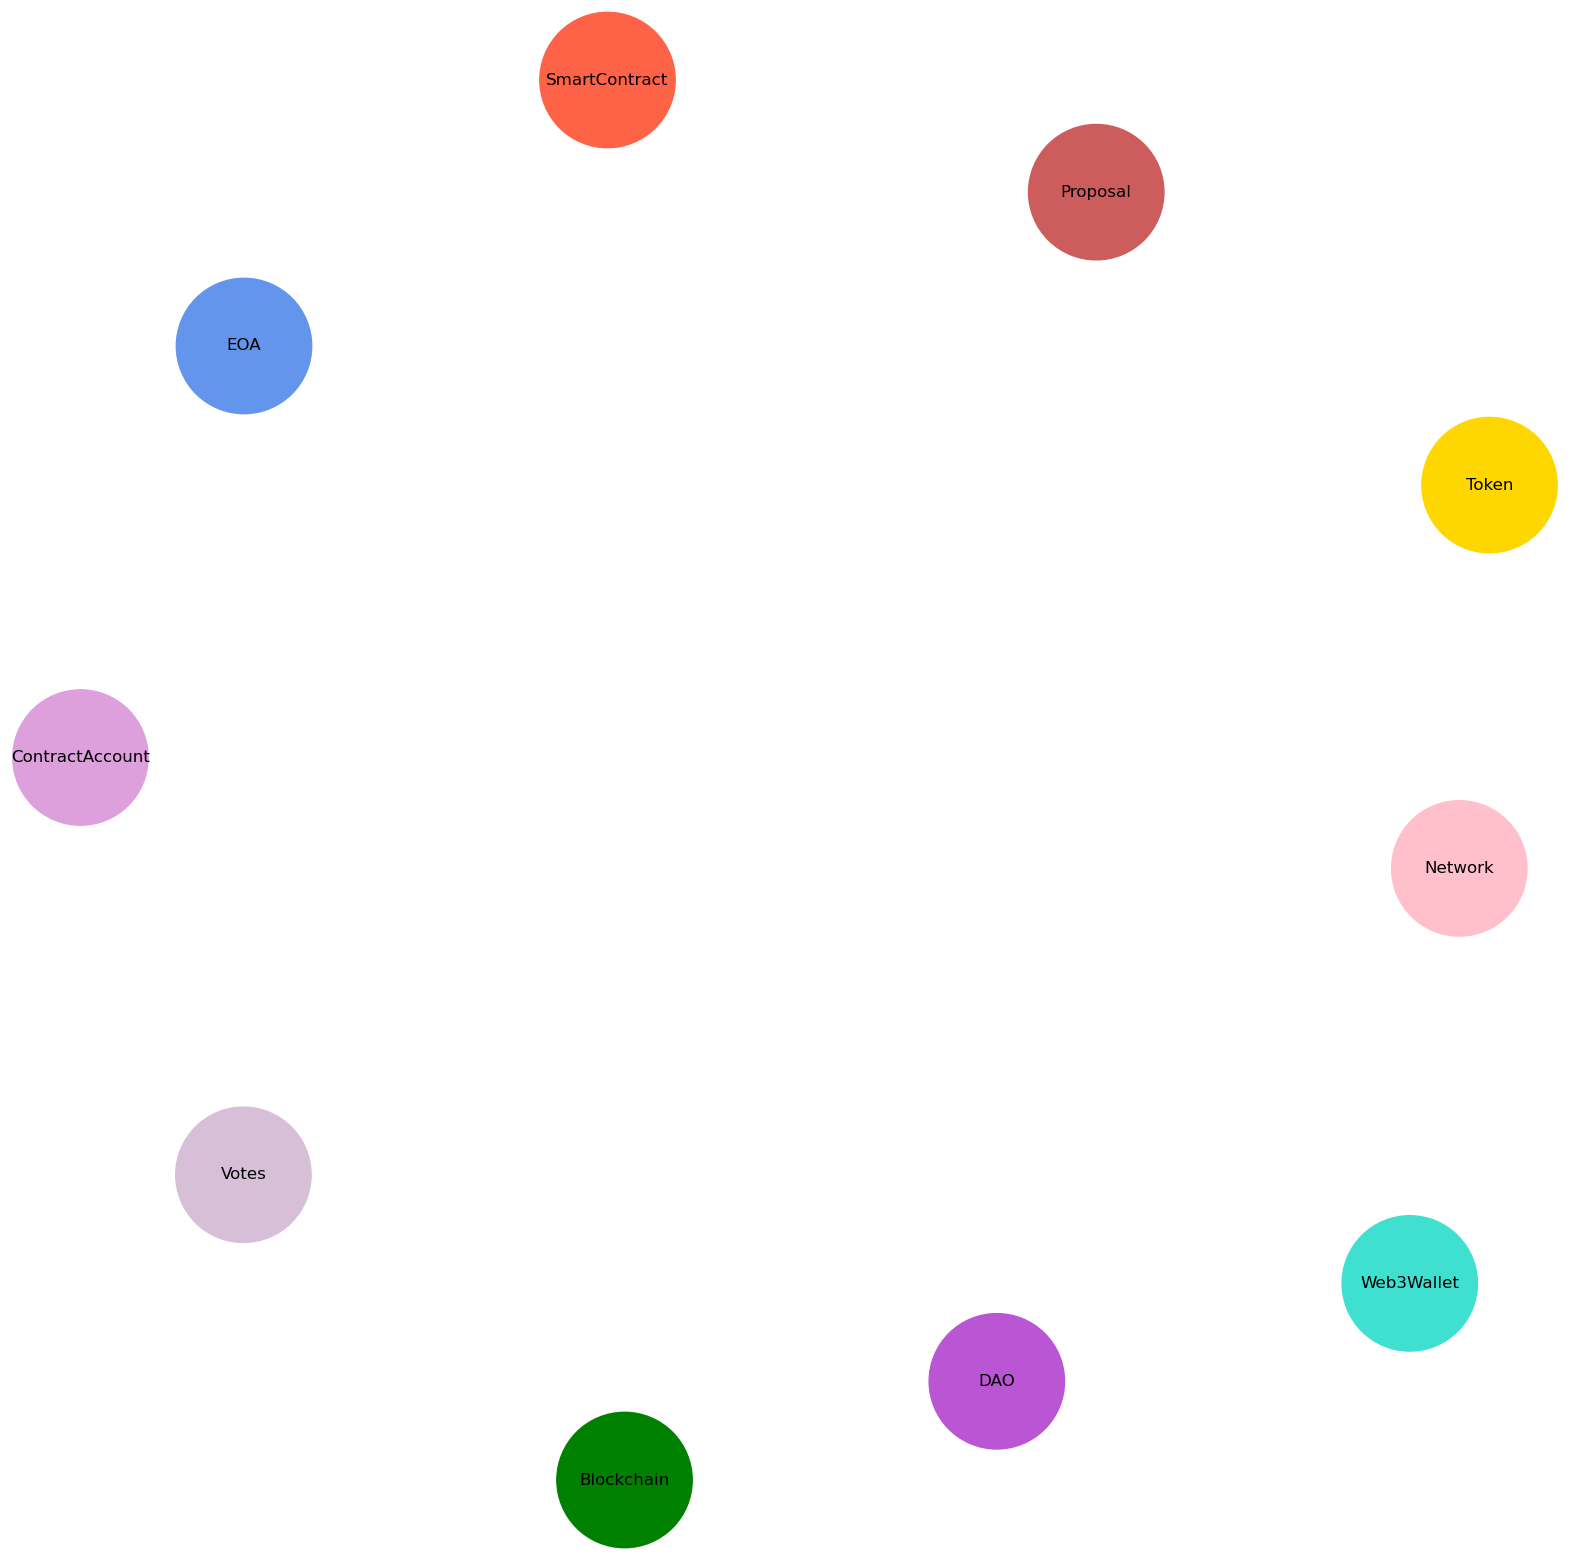

In [90]:
fig, ax = plt.subplots(figsize=(20,20))
daos_layout = nx.spring_layout(g_daos, 
                       k=3, iterations=50,
                       seed=2)
node_colors = []
for node in g_daos.nodes:
    node_colors.append(g_daos.nodes[node].get('color', 'olive'))
nx.draw(g_daos, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=9500,
        with_labels=True
       )
plt.show()

In [91]:
# Assign shape according to the node category.
# https://matplotlib.org/stable/api/markers_api.html
g_daos.nodes["Blockchain"]['shape'] = 'P'
g_daos.nodes["Network"]['shape'] = '^'
g_daos.nodes["DAO"]['shape'] = 'o'
g_daos.nodes["EOA"]['shape'] = 's'
g_daos.nodes["Votes"]['shape'] = '8'
g_daos.nodes["Proposal"]['shape'] = 'd'
g_daos.nodes["ContractAccount"]['shape'] = 's'
g_daos.nodes["SmartContract"]['shape'] = 'H'
g_daos.nodes["Token"]['shape'] = '*'
g_daos.nodes["Web3Wallet"]['shape'] = 'D'

In [92]:
node_shapes = set((node[1]['shape'] for node in g_daos.nodes(data=True)))
node_shapes

{'*', '8', 'D', 'H', 'P', '^', 'd', 'o', 's'}

In [93]:
color_dictionary_shape = {'*': 'gold', '8': 'thistle', 
                          'D':'olive', 'H': 'tomato', 'd':'plum',
                          'o':'mediumorchid', 'p':'slateblue',
                          's':'teal', 'P':'green', '^':'turquoise' 
                         }
color_dictionary_shape

{'*': 'gold',
 '8': 'thistle',
 'D': 'olive',
 'H': 'tomato',
 'd': 'plum',
 'o': 'mediumorchid',
 'p': 'slateblue',
 's': 'teal',
 'P': 'green',
 '^': 'turquoise'}

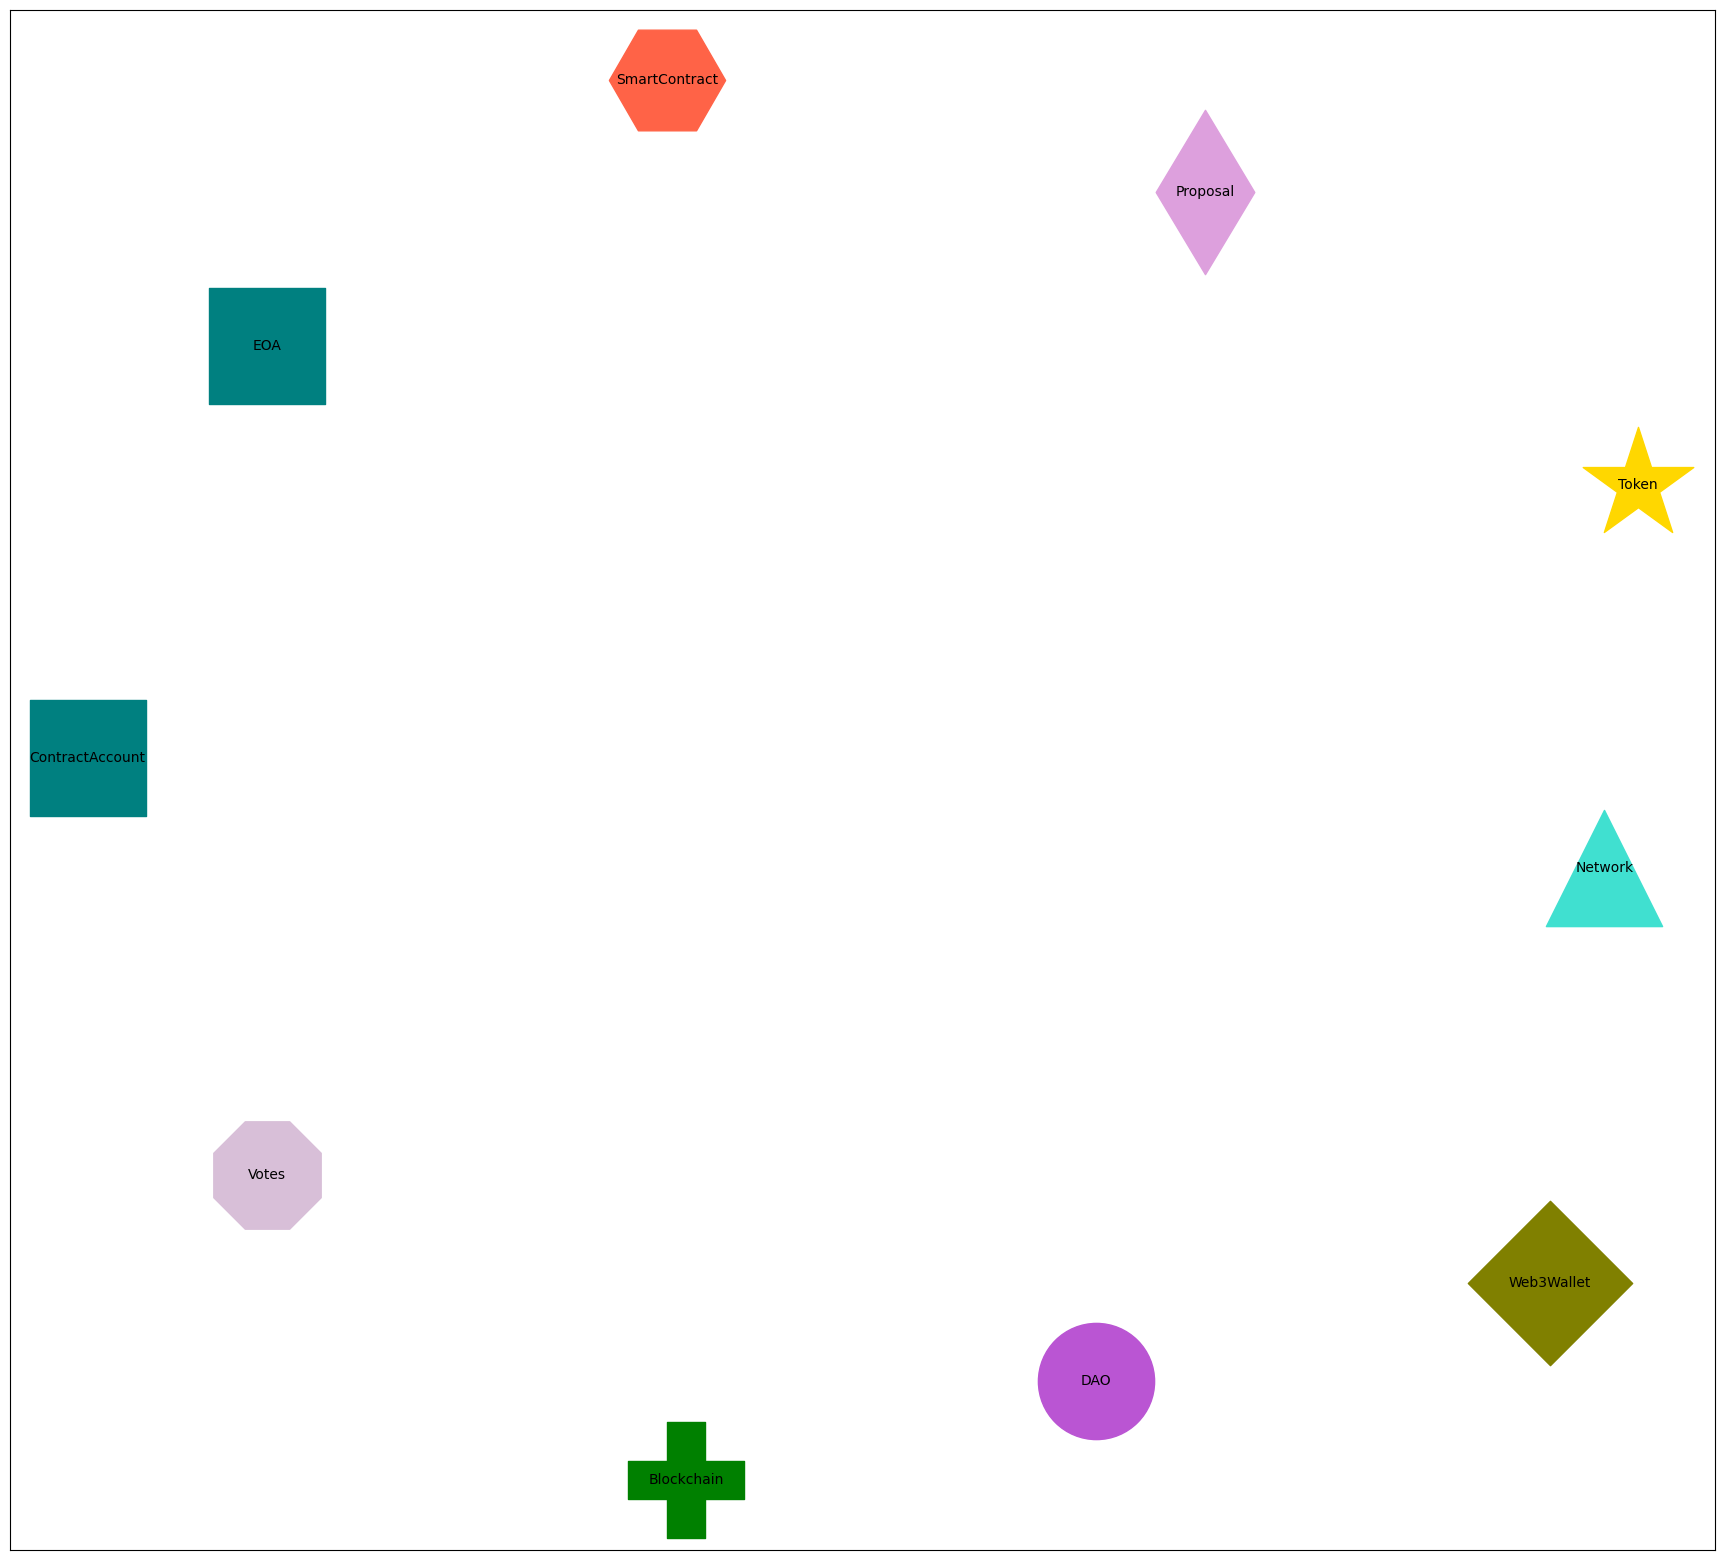

In [94]:
fig, ax = plt.subplots(figsize=(22,20))
daos_layout = nx.spring_layout(g_daos, 
                       k=3, iterations=50,
                       seed=2)
for shape in node_shapes:
    nx.draw_networkx_nodes(g_daos,
                           pos=daos_layout,
                           node_color = (color_dictionary_shape[shape] 
                                         if shape in color_dictionary_shape.keys() else 'olive'),
                           node_shape = shape,
                           node_size = 7000,
                           nodelist = [node[0] for node in g_daos.nodes(data=True) 
                                       if node[1]['shape'] == shape])
nx.draw_networkx_labels(g_daos, pos=daos_layout, font_size='10')
plt.show()

### 3.2. Edges

In [95]:
dao_edges = [{"source":"Network", "relation_type":"isPartOf", "target":"Blockchain"},
             {"source":"SmartContract", "relation_type":"deployedOn", "target":"Network"},
             {"source":"DAO", "relation_type":"operates", "target":"EOA"},
             {"source":"DAO", "relation_type":"owns", "target":"Token"},
             {"source":"DAO", "relation_type":"shares", "target":"Web3Wallet"},
             {"source":"DAO", "relation_type":"builtOn", "target":"SmartContract"},
             {"source":"SmartContract", "relation_type":"isAssociatedWith", "target":"ContractAccount"},
             {"source":"DAO", "relation_type":"receives", "target":"Proposal"},
             {"source":"Token", "relation_type":"managedBy", "target":"Web3Wallet"},
             {"source":"EOA", "relation_type":"creates", "target":"Proposal"},
             {"source":"Proposal", "relation_type":"hasResponsibleMember", "target":"EOA"},
             {"source":"EOA", "relation_type":"isPartOf", "target":"Web3Wallet"},
             {"source":"Proposal", "relation_type":"proposalHasVotes", "target":"Votes"},
             {"source":"EOA", "relation_type":"eoaHasVotes", "target":"Votes"}
            ]

In [96]:
dao_edges_df = pd.DataFrame(dao_edges)
dao_edges_df

,source,relation_type,target
0,Network,isPartOf,Blockchain
1,SmartContract,deployedOn,Network
2,DAO,operates,EOA
3,DAO,owns,Token
4,DAO,shares,Web3Wallet
5,DAO,builtOn,SmartContract
6,SmartContract,isAssociatedWith,ContractAccount
7,DAO,receives,Proposal
8,Token,managedBy,Web3Wallet
9,EOA,creates,Proposal


In [97]:
g_dao_edges = nx.from_pandas_edgelist(dao_edges_df, 'source', 'target', 
                                     edge_attr='relation_type',
                                     create_using=nx.DiGraph())

In [98]:
g_daos = nx.compose(g_daos, g_dao_edges)

### 3.3. Knowledge Graph of node concepts

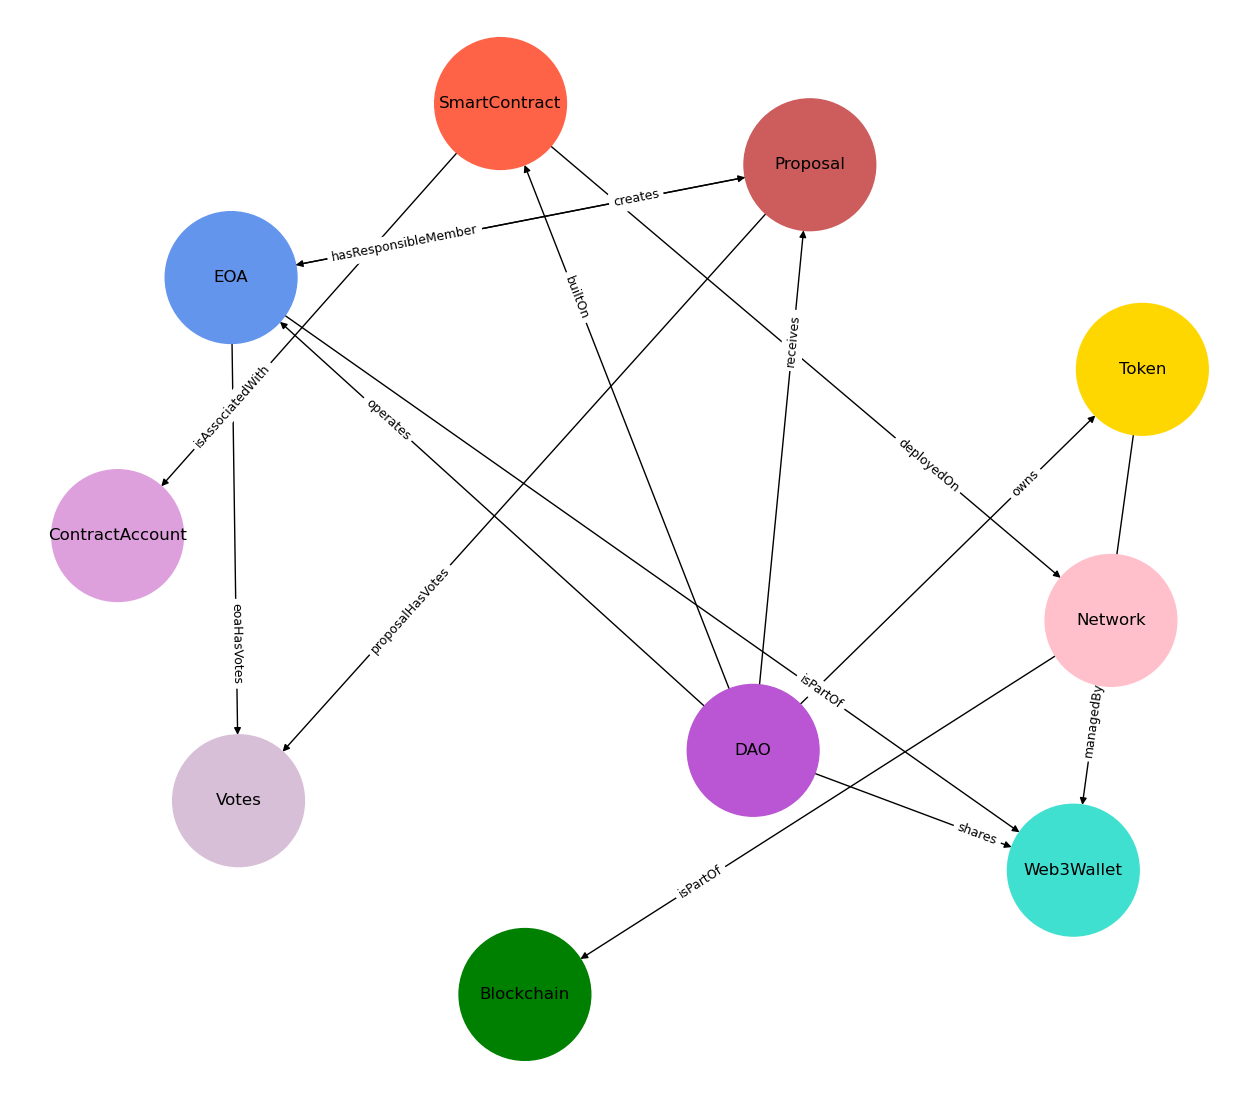

In [99]:
g_daos_length=nx.Graph(g_daos)
for (u,v,d) in g_daos.edges(data=True):
    g_daos_length.add_edge(u,v,len=str(len(d['relation_type'])))

fig, ax = plt.subplots(figsize=(16,14))
daos_layout = nx.spring_layout(g_daos, 
                       k=2.7, iterations=50,
                       seed=2)
node_colors = []
for node in g_daos.nodes:
    node_colors.append(g_daos.nodes[node].get('color', 'olive'))
nx.draw(g_daos, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=9000,
        with_labels=True
       )

labels = nx.get_edge_attributes(g_daos,'relation_type')
# añadimos label_pos y font_size para que se muestren todas
# las etiquetas vinculadas a dos mismos nodos (sino como se indicaba al principio
# de esta celda, solamente se muestra la última relación vinculada entre dos mismos
#nodos.
nx.draw_networkx_edge_labels(g_daos,
                             pos = daos_layout,
                             edge_labels=labels, label_pos=0.3, font_size=9)
plt.show()

### 3.4. Definition of concept attributes

In [100]:
mdg_daos = nx.MultiDiGraph()

In [101]:
dao_nodes = ["Blockchain", "Network", "DAO", 
             "EOA", "Proposal", "ContractAccount",  
              "SmartContract", "Token", "Web3Wallet", "Votes"]

In [102]:
for item in dao_nodes:
    mdg_daos.add_node(item)

In [103]:
# Assign a color to each node.
mdg_daos.nodes["Blockchain"]['color'] = 'green'
mdg_daos.nodes["Network"]['color'] = 'pink'
mdg_daos.nodes["DAO"]['color'] = 'mediumorchid'
mdg_daos.nodes["EOA"]['color'] = 'cornflowerblue'
mdg_daos.nodes["Proposal"]['color'] = 'indianred'
mdg_daos.nodes["ContractAccount"]['color'] = 'plum'
mdg_daos.nodes["SmartContract"]['color'] = 'tomato'
mdg_daos.nodes["Token"]['color'] = 'gold'
mdg_daos.nodes["Web3Wallet"]['color'] = 'turquoise'
mdg_daos.nodes["Votes"]['color'] = 'slateblue'

In [104]:
list(mdg_daos.nodes(data=True))

[('Blockchain', {'color': 'green'}),
 ('Network', {'color': 'pink'}),
 ('DAO', {'color': 'mediumorchid'}),
 ('EOA', {'color': 'cornflowerblue'}),
 ('Proposal', {'color': 'indianred'}),
 ('ContractAccount', {'color': 'plum'}),
 ('SmartContract', {'color': 'tomato'}),
 ('Token', {'color': 'gold'}),
 ('Web3Wallet', {'color': 'turquoise'}),
 ('Votes', {'color': 'slateblue'})]

#### 3.4.1. Blockchain attributes

In [105]:
attr_blockchain = [{"source":"Blockchain", "attribute":"id", "target":"string", "rad":0.1},
                   {"source":"Blockchain", "attribute":"name", "target":"string", "rad":0.2}
                  ]

In [106]:
attr_blockchain_df = pd.DataFrame(attr_blockchain)
attr_blockchain_df

,source,attribute,target,rad
0,Blockchain,id,string,0.1
1,Blockchain,name,string,0.2


In [107]:
mdg_blockchain = nx.from_pandas_edgelist(attr_blockchain_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())

In [108]:
mdg_daos = nx.compose(mdg_daos, mdg_blockchain)

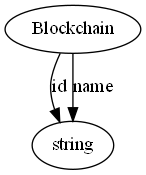

In [109]:
for edge in mdg_blockchain.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_blockchain,'id')
pos = nx.spring_layout(mdg_blockchain)
p=nx.drawing.nx_pydot.to_pydot(mdg_blockchain)
p.write_png('./graphs/daos_blockchain.png')
Image(filename='./graphs/daos_blockchain.png')

#### 3.4.2. DAO attributes

In [110]:
attr_dao = [{"source":"DAO", "attribute":"name", "target":"string", "rad":0.2},
            {"source":"DAO", "attribute":"createdAt", "target":"date", "rad":0.4},
            {"source":"DAO", "attribute":"totalShares", "target":"integer", "rad":0.5 },
            {"source":"DAO", "attribute":"totalLoot", "target":"integer", "rad":0.6 },
           ]

In [111]:
attr_dao_df = pd.DataFrame(attr_dao)
attr_dao_df

,source,attribute,target,rad
0,DAO,name,string,0.2
1,DAO,createdAt,date,0.4
2,DAO,totalShares,integer,0.5
3,DAO,totalLoot,integer,0.6


In [112]:
mdg_dao = nx.from_pandas_edgelist(attr_dao_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_dao)

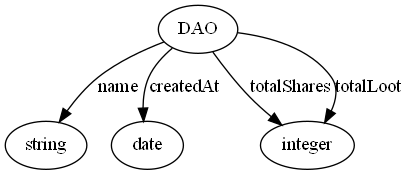

In [113]:
for edge in mdg_dao.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_dao,'id')
pos = nx.spring_layout(mdg_dao)
p=nx.drawing.nx_pydot.to_pydot(mdg_dao)
p.write_png('./graphs/daos_dao.png')
Image(filename='./graphs/daos_dao.png')

#### 3.4.3. EOA attributes

In [114]:
attr_eoa = [{"source":"EOA", "attribute":"accountAddress", "target":"string", "rad":0.1}]

In [115]:
attr_eoa_df = pd.DataFrame(attr_eoa)
attr_eoa_df

,source,attribute,target,rad
0,EOA,accountAddress,string,0.1


In [116]:
mdg_eoa = nx.from_pandas_edgelist(attr_eoa_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_eoa)

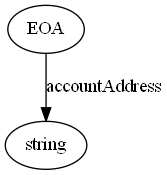

In [117]:
for edge in mdg_eoa.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_eoa,'id')
pos = nx.spring_layout(mdg_eoa)
p=nx.drawing.nx_pydot.to_pydot(mdg_eoa)
p.write_png('./graphs/daos_eoa.png')
Image(filename='./graphs/daos_eoa.png')

#### 3.4.4. Network attributes

In [118]:
attr_network = [{"source":"Network", "attribute":"id", "target":"string", "rad":0.1},
                {"source":"Network", "attribute":"name", "target":"string", "rad":0.2}                ,
                {"source":"Network", "attribute":"chainId", "target":"integer", "rad":0.3}
               ]

In [119]:
attr_network_df = pd.DataFrame(attr_network)
attr_network_df

,source,attribute,target,rad
0,Network,id,string,0.1
1,Network,name,string,0.2
2,Network,chainId,integer,0.3


In [120]:
mdg_network = nx.from_pandas_edgelist(attr_network_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_network)

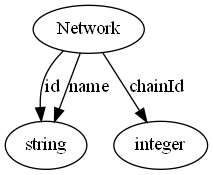

In [121]:
for edge in mdg_network.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_network,'id')
pos = nx.spring_layout(mdg_network)
p=nx.drawing.nx_pydot.to_pydot(mdg_network)
p.write_png('./graphs/daos_network.png')
Image(filename='./graphs/daos_network.png')

#### 3.4.5. Proposal attributes

In [122]:
attr_proposal = [{"source":"Proposal", "attribute":"id", "target":"string", "rad":0.1},
                 {"source":"Proposal", "attribute":"createdAt", "target":"date", "rad":0.2},
                 {"source":"Proposal", "attribute":"processed", "target":"boolean", "rad":0.3},
                 {"source":"Proposal", "attribute":"processedAt", "target":"date", "rad":0.4},
                 {"source":"Proposal", "attribute":"didPass", "target":"boolean", "rad":0.5},
                 {"source":"Proposal", "attribute":"summary", "target":"string", "rad":0.6},
                 {"source":"Proposal", "attribute":"yesVotes", "target":"integer", "rad":0.7},
                 {"source":"Proposal", "attribute":"noVotes", "target":"integer", "rad":0.8}
              ]

In [123]:
attr_proposal_df = pd.DataFrame(attr_proposal)
attr_proposal_df

,source,attribute,target,rad
0,Proposal,id,string,0.1
1,Proposal,createdAt,date,0.2
2,Proposal,processed,boolean,0.3
3,Proposal,processedAt,date,0.4
4,Proposal,didPass,boolean,0.5
5,Proposal,summary,string,0.6
6,Proposal,yesVotes,integer,0.7
7,Proposal,noVotes,integer,0.8


In [124]:
mdg_proposal = nx.from_pandas_edgelist(attr_proposal_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_proposal)

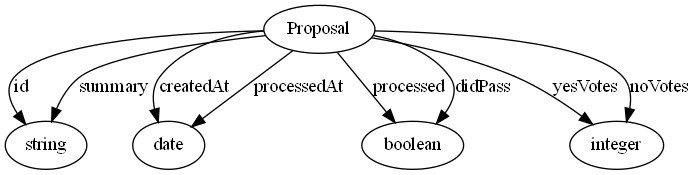

In [125]:
for edge in mdg_proposal.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_proposal,'id')
pos = nx.spring_layout(mdg_proposal)
p=nx.drawing.nx_pydot.to_pydot(mdg_proposal)
p.write_png('./graphs/daos_proposal.png')
Image(filename='./graphs/daos_proposal.png')

#### 3.4.6. SmartContract attributes

In [126]:
attr_smart_contract = [{"source":"SmartContract", "attribute":"contractSize", "target":"integer", "rad":0.1}]

In [127]:
attr_smart_contract_df = pd.DataFrame(attr_smart_contract)
attr_smart_contract_df

,source,attribute,target,rad
0,SmartContract,contractSize,integer,0.1


In [128]:
mdg_smart_contract = nx.from_pandas_edgelist(attr_smart_contract_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_smart_contract)

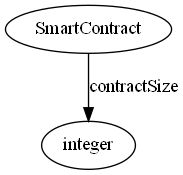

In [129]:
for edge in mdg_smart_contract.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_smart_contract,'id')
pos = nx.spring_layout(mdg_smart_contract)
p=nx.drawing.nx_pydot.to_pydot(mdg_smart_contract)
p.write_png('./graphs/daos_smart_contract.png')
Image(filename='./graphs/daos_smart_contract.png')

#### 3.4.7. ContractAccount attributes

In [130]:
# La dirección de la cuenta se corresponde con el atributo "name"
# de la clase foaf:OnlineAccount de la ontología.
attr_contractAccount = [{"source":"ContractAccount", "attribute":"accountAddress", "target":"string", "rad":0.1}]

In [131]:
attr_contractAccount_df = pd.DataFrame(attr_contractAccount)
attr_contractAccount_df

,source,attribute,target,rad
0,ContractAccount,accountAddress,string,0.1


In [132]:
mdg_contractAccount = nx.from_pandas_edgelist(attr_contractAccount_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_contractAccount)

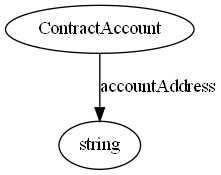

In [133]:
for edge in mdg_contractAccount.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_contractAccount,'id')
pos = nx.spring_layout(mdg_contractAccount)
p=nx.drawing.nx_pydot.to_pydot(mdg_contractAccount)
p.write_png('./graphs/daos_contract_account.png')
Image(filename='./graphs/daos_contract_account.png')

#### 3.4.8. Token attributes

In [134]:
attr_token = [{"source":"Token", "attribute":"id", "target":"integer", "rad":0.1},
              {"source":"Token", "attribute":"balance", "target":"double", "rad":0.2},
              {"source":"Token", "attribute":"symbol", "target":"string", "rad":0.3},
              {"source":"Token", "attribute":"usdValue", "target":"double", "rad":0.4}
             ]

In [135]:
attr_token_df = pd.DataFrame(attr_token)
attr_token_df

,source,attribute,target,rad
0,Token,id,integer,0.1
1,Token,balance,double,0.2
2,Token,symbol,string,0.3
3,Token,usdValue,double,0.4


In [136]:
mdg_token = nx.from_pandas_edgelist(attr_token_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_token)

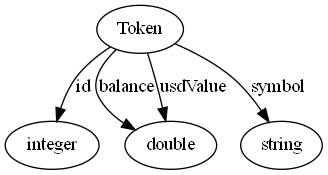

In [137]:
for edge in mdg_token.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_token,'id')
pos = nx.spring_layout(mdg_token)
p=nx.drawing.nx_pydot.to_pydot(mdg_token)
p.write_png('./graphs/daos_token.png')
Image(filename='./graphs/daos_token.png')

#### 3.4.9. Web3 Wallet attributes

In [138]:
attr_web3_wallet = [{"source":"Web3Wallet", "attribute":"id", "target":"string", "rad":0.1},
               {"source":"Web3Wallet", "attribute":"name", "target":"string", "rad":0.2},
               {"source":"Web3Wallet", "attribute":"type", "target":"string", "rad":0.3},
               {"source":"Web3Wallet", "attribute":"password", "target":"string", "rad":0.4},
               {"source":"Web3Wallet", "attribute":"privateKey", "target":"string", "rad":0.5}
              ]

In [139]:
attr_web3_wallet_df = pd.DataFrame(attr_web3_wallet)
attr_web3_wallet_df

,source,attribute,target,rad
0,Web3Wallet,id,string,0.1
1,Web3Wallet,name,string,0.2
2,Web3Wallet,type,string,0.3
3,Web3Wallet,password,string,0.4
4,Web3Wallet,privateKey,string,0.5


In [140]:
mdg_web3_wallet = nx.from_pandas_edgelist(attr_web3_wallet_df, 'source','target', 
                                       edge_attr=['attribute', 'rad'],
                                       create_using=nx.MultiDiGraph())
mdg_daos = nx.compose(mdg_daos, mdg_web3_wallet)

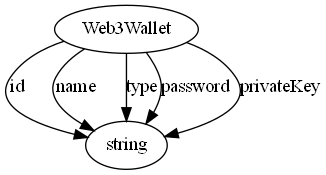

In [141]:
for edge in mdg_web3_wallet.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_web3_wallet,'id')
pos = nx.spring_layout(mdg_web3_wallet)
p=nx.drawing.nx_pydot.to_pydot(mdg_web3_wallet)
p.write_png('./graphs/web3_wallets.png')
Image(filename='./graphs/web3_wallets.png')

### 3.5. Knowledge Graph of node concepts and attributes

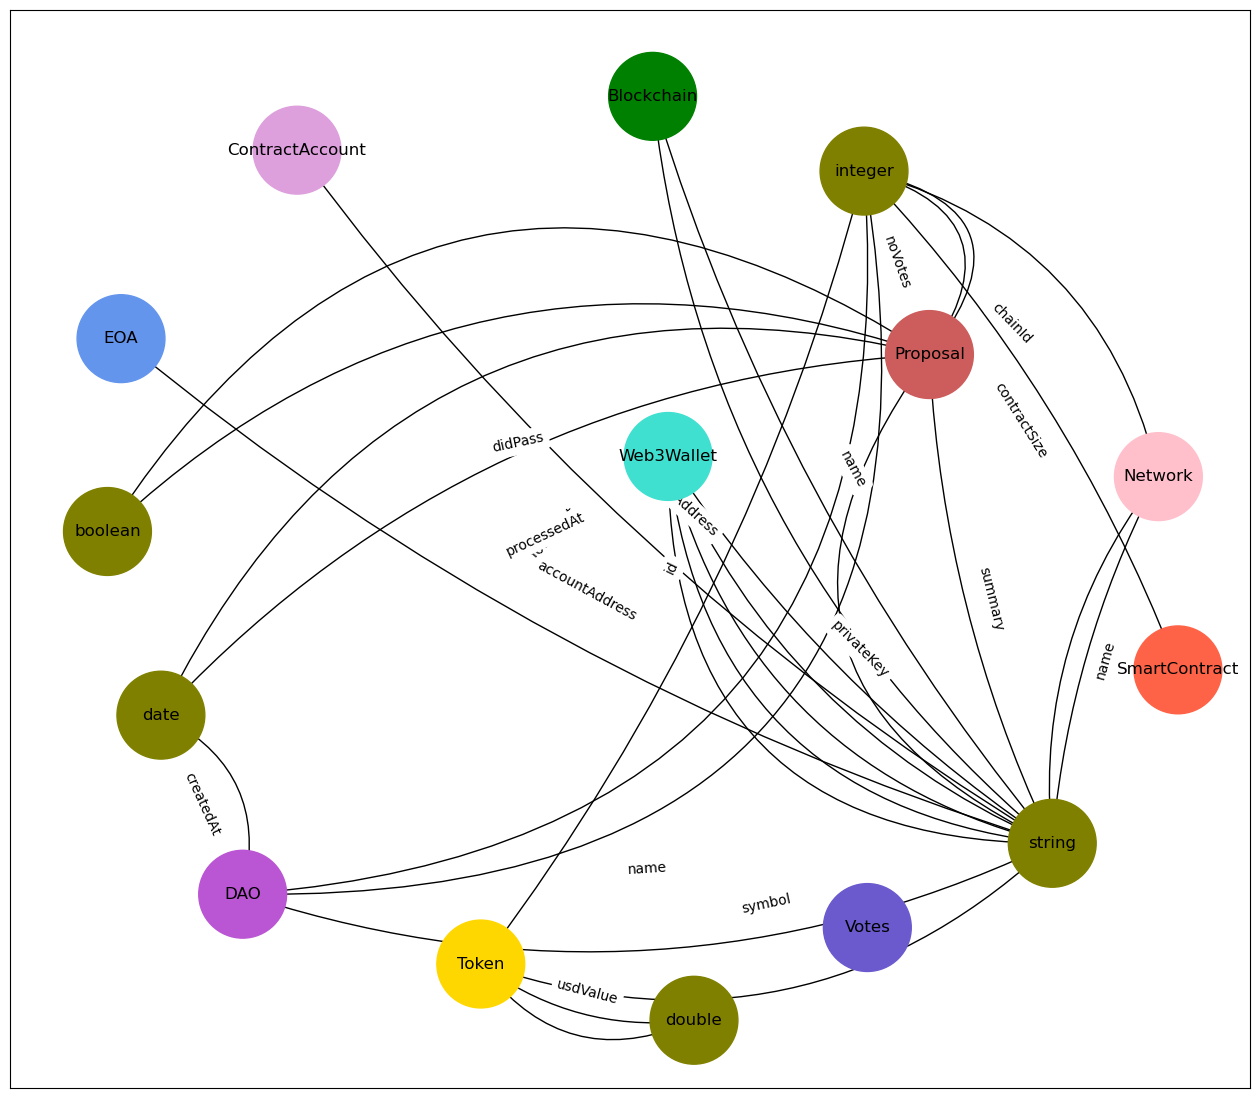

In [142]:
fig, ax = plt.subplots(figsize=(16,14))
daos_layout = nx.spring_layout(mdg_daos, 
                       k=3, iterations=50,
                       seed=42)
node_colors = []
for node in mdg_daos.nodes:
    node_colors.append(mdg_daos.nodes[node].get('color', 'olive'))
nx.draw_networkx_nodes(mdg_daos, 
                       pos=daos_layout,
                       node_size=4000,
                       node_color = node_colors
                      )
nx.draw_networkx_labels(mdg_daos, pos=daos_layout)
for edge in mdg_daos.edges(data=True):
    nx.draw_networkx_edges(mdg_daos, pos=daos_layout, edgelist=[(edge[0],edge[1])], 
                           connectionstyle=f'arc3, rad = {edge[2]["rad"]}')
labels=dict([((u,v,),d['attribute'])
             for u,v,d in mdg_daos.edges(data=True)])
nx.draw_networkx_edge_labels(mdg_daos,
                             pos = daos_layout,
                             edge_labels=labels
                            )
plt.show()

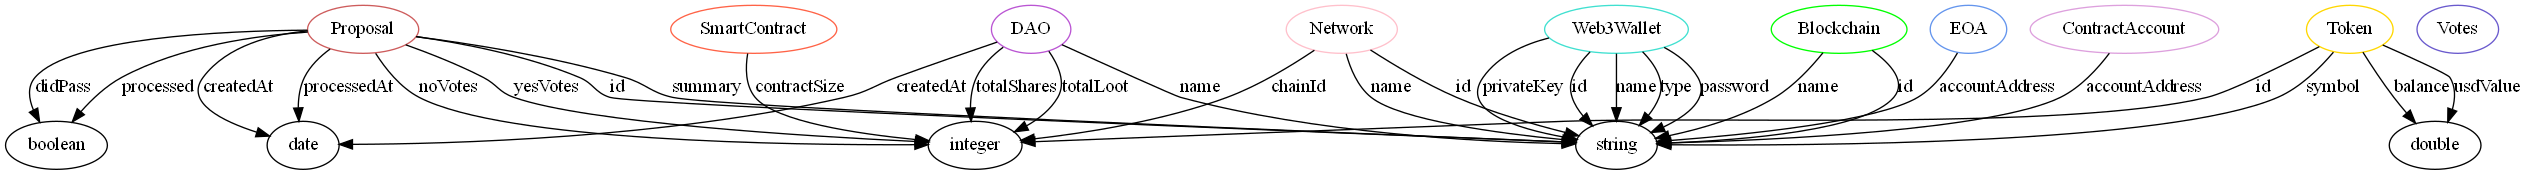

In [143]:
for edge in mdg_daos.edges(data=True): edge[2]['label'] = edge[2]['attribute']
node_label = nx.get_node_attributes(mdg_daos,'id')
pos = nx.spring_layout(mdg_daos)
node_label = nx.get_node_attributes(mdg_daos,'id')
pos = nx.spring_layout(mdg_daos)
p=nx.drawing.nx_pydot.to_pydot(mdg_daos)
p.write_png('./graphs/daos.png')
Image(filename='./graphs/daos.png')

### 3.6. Management of instances

In [144]:
def get_node_from_graph(node_id, graph):
    return [node for node in graph.nodes() 
            if node == node_id]

In [145]:
dg_daos = nx.DiGraph()

In [146]:
dao_nodes = ["EOA", "Proposal", "ContractAccount"]

In [147]:
for item in dao_nodes:
    dg_daos.add_node(item)

In [148]:
# Assign a color to each node.
dg_daos.nodes["EOA"]['color'] = 'cornflowerblue'
dg_daos.nodes["Proposal"]['color'] = 'indianred'
dg_daos.nodes["ContractAccount"]['color'] = 'tomato'

#### Example: Proposals

In [149]:
# To illustrates an example, only select the proposals of DAO with the next address:
proposals_sample_df = proposals_df[proposals_df["daoAddress"] == '0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa']
proposals_sample_df

,proposalId,proposalCode,details,proposer,responsibleMember,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,0,"{""title"":""0"",""proposalType"":""Funding Proposal""}",0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-01-19 21:13:59,2,0,True,2023-01-16 03:41:35
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,1,"{""title"":""b"",""proposalType"":""Funding Proposal""}",0x091fcbb9186f392610740038ea5b8007fe7674e4,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-02-15 03:52:47,1,0,True,2023-02-04 12:21:47
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,2,"{""title"":""c"",""proposalType"":""Funding Proposal""}",0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-02-15 18:20:47,2,0,True,2023-02-09 04:30:47
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,3,"{""title"":""k"",""description"":""pw"",""proposalType""...",0x140d3f60ac840571a3e08e218b823094d4715564,0x140d3f60ac840571a3e08e218b823094d4715564,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,250000000000000000,True,2023-02-25 17:49:35,1,0,True,2023-02-21 20:45:47
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-pro...,4,"{""title"":""lcoa"",""description"":""pd"",""proposalTy...",0x140d3f60ac840571a3e08e218b823094d4715564,0x140d3f60ac840571a3e08e218b823094d4715564,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa,300000000000000000,True,2023-02-26 19:18:59,1,0,True,2023-02-22 03:19:23


In [150]:
proposals_sample_df.shape

(5, 13)

In [151]:
# Set unlimited length for each column.
pd.set_option('max_colwidth', None) 

In [152]:
# proposer
proposal_instances_df = proposals_sample_df[["proposalId", "proposer"]]
proposal_instances_df.rename(columns = {'proposer':'proposal_attr'}, inplace = True)
proposal_instances_df["attr_relation"] = "proposer"
proposal_instances_df

,proposalId,proposal_attr,attr_relation
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer


In [153]:
# responsibleMember
# When the value is equals to 0x0000000000000000000000000000000000000000
# this is due to the proposer is a member of the DAO and it is considered
# the responsible of the proposal. Sometimes is a member, but the responsible
# could be the same or another member.
proposal_responsible_instances_df = proposals_sample_df[["proposalId", "responsibleMember"]]
proposal_responsible_instances_df.rename(columns = {'responsibleMember':'proposal_attr'}, inplace = True)
proposal_responsible_instances_df["attr_relation"] = "responsible_member"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_responsible_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


In [154]:
# daoAddress
proposal_address_instances_df = proposals_sample_df[["proposalId", "daoAddress"]]
proposal_address_instances_df.rename(columns = {'daoAddress':'proposal_attr'}, inplace = True)
proposal_address_instances_df["attr_relation"] = "dao_address"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_address_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


In [155]:
# processed
proposal_processed_instances_df = proposals_sample_df[["proposalId", "processed"]]
proposal_processed_instances_df.rename(columns = {'processed':'proposal_attr'}, inplace = True)
proposal_processed_instances_df["attr_relation"] = "processed"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_processed_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


In [156]:
# didPass
proposal_did_pass_instances_df = proposals_sample_df[["proposalId", "didPass"]]
proposal_did_pass_instances_df.rename(columns = {'didPass':'proposal_attr'}, inplace = True)
proposal_did_pass_instances_df["attr_relation"] = "did_pass"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_did_pass_instances_df])
proposal_instances_df.reset_index(inplace =True, drop = True)
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


Since, proposer and responsibleMember are EOAs, we are going to define these relationships.

In [157]:
# proposer
proposal_proposer_df = proposals_sample_df[["proposer"]]
proposal_proposer_df.drop_duplicates(inplace=True)
proposal_proposer_df.reset_index(drop=True, inplace=True)
proposal_proposer_df.rename(columns = {'proposer':'proposalId'}, inplace = True)
proposal_proposer_df["proposal_attr"] = "EOA"
proposal_proposer_df["attr_relation"] = "type"
proposal_proposer_df

,proposalId,proposal_attr,attr_relation
0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,EOA,type
1,0x091fcbb9186f392610740038ea5b8007fe7674e4,EOA,type
2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,EOA,type
3,0x140d3f60ac840571a3e08e218b823094d4715564,EOA,type


In [158]:
proposal_instances_df = pd.concat([proposal_instances_df, proposal_proposer_df])
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


In [159]:
# isResponsibleMember
proposal_responsible_df = proposals_sample_df[["responsibleMember"]]
proposal_responsible_df = proposal_responsible_df[proposal_responsible_df["responsibleMember"] != '0x0000000000000000000000000000000000000000']
proposal_responsible_df.drop_duplicates(inplace=True)
proposal_responsible_df.reset_index(drop=True, inplace=True)
proposal_responsible_df.rename(columns = {'responsibleMember':'proposalId'}, inplace = True)
proposal_responsible_df["proposal_attr"] = "EOA"
proposal_responsible_df["attr_relation"] = "type"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_responsible_df])
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


Since daoAddress is a SmartContrat, we are going to define this relationship.

In [160]:
# ContractAccount
proposal_dao_df = proposals_sample_df[["daoAddress"]]
proposal_dao_df.drop_duplicates(inplace=True)
proposal_dao_df.reset_index(drop=True, inplace=True)
proposal_dao_df.rename(columns = {'daoAddress':'proposalId'}, inplace = True)
proposal_dao_df["proposal_attr"] = "ContractAccount"
proposal_dao_df["attr_relation"] = "type"
proposal_instances_df = pd.concat([proposal_instances_df, proposal_dao_df])
proposal_instances_df

,proposalId,proposal_attr,attr_relation
0,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,proposer
1,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x091fcbb9186f392610740038ea5b8007fe7674e4,proposer
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x00c369d78ff2cc7922d7c0a8aea7fc9d8e7f2b99,proposer
3,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
4,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,proposer
5,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-0,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
6,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-1,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
7,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-2,0x2bf034eccebc8cd60dab9c249b6c2996dcb7d8ec,responsible_member
8,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-3,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member
9,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa-proposal-4,0x140d3f60ac840571a3e08e218b823094d4715564,responsible_member


In [161]:
dg_proposal_instances = nx.from_pandas_edgelist(proposal_instances_df, 
                                                'proposalId', 'proposal_attr', 
                                                edge_attr='attr_relation',
                                                create_using=nx.DiGraph())

In [162]:
# Set instance color.
for node in dg_proposal_instances.nodes(data=True):
    if node[0] != "EOA" and node[0] != "ContractAccount":
        dg_proposal_instances.nodes[node[0]]['color'] = 'plum'

In [163]:
dg_daos_proposal_instances = nx.DiGraph(dg_daos)
dg_daos_proposal_instances = nx.compose(dg_daos_proposal_instances, dg_proposal_instances)

In [164]:
# Get the node "Proposal" from the graph.
node_proposal = get_node_from_graph("Proposal", dg_daos_proposal_instances)
node_proposal = node_proposal[0]
node_proposal

'Proposal'

In [165]:
for edge in dg_proposal_instances.edges(data=True):
    if dg_daos_proposal_instances[edge[0]][edge[1]]["attr_relation"] != "type":
        dg_daos_proposal_instances.add_edge(edge[0], node_proposal, attr_relation="type")

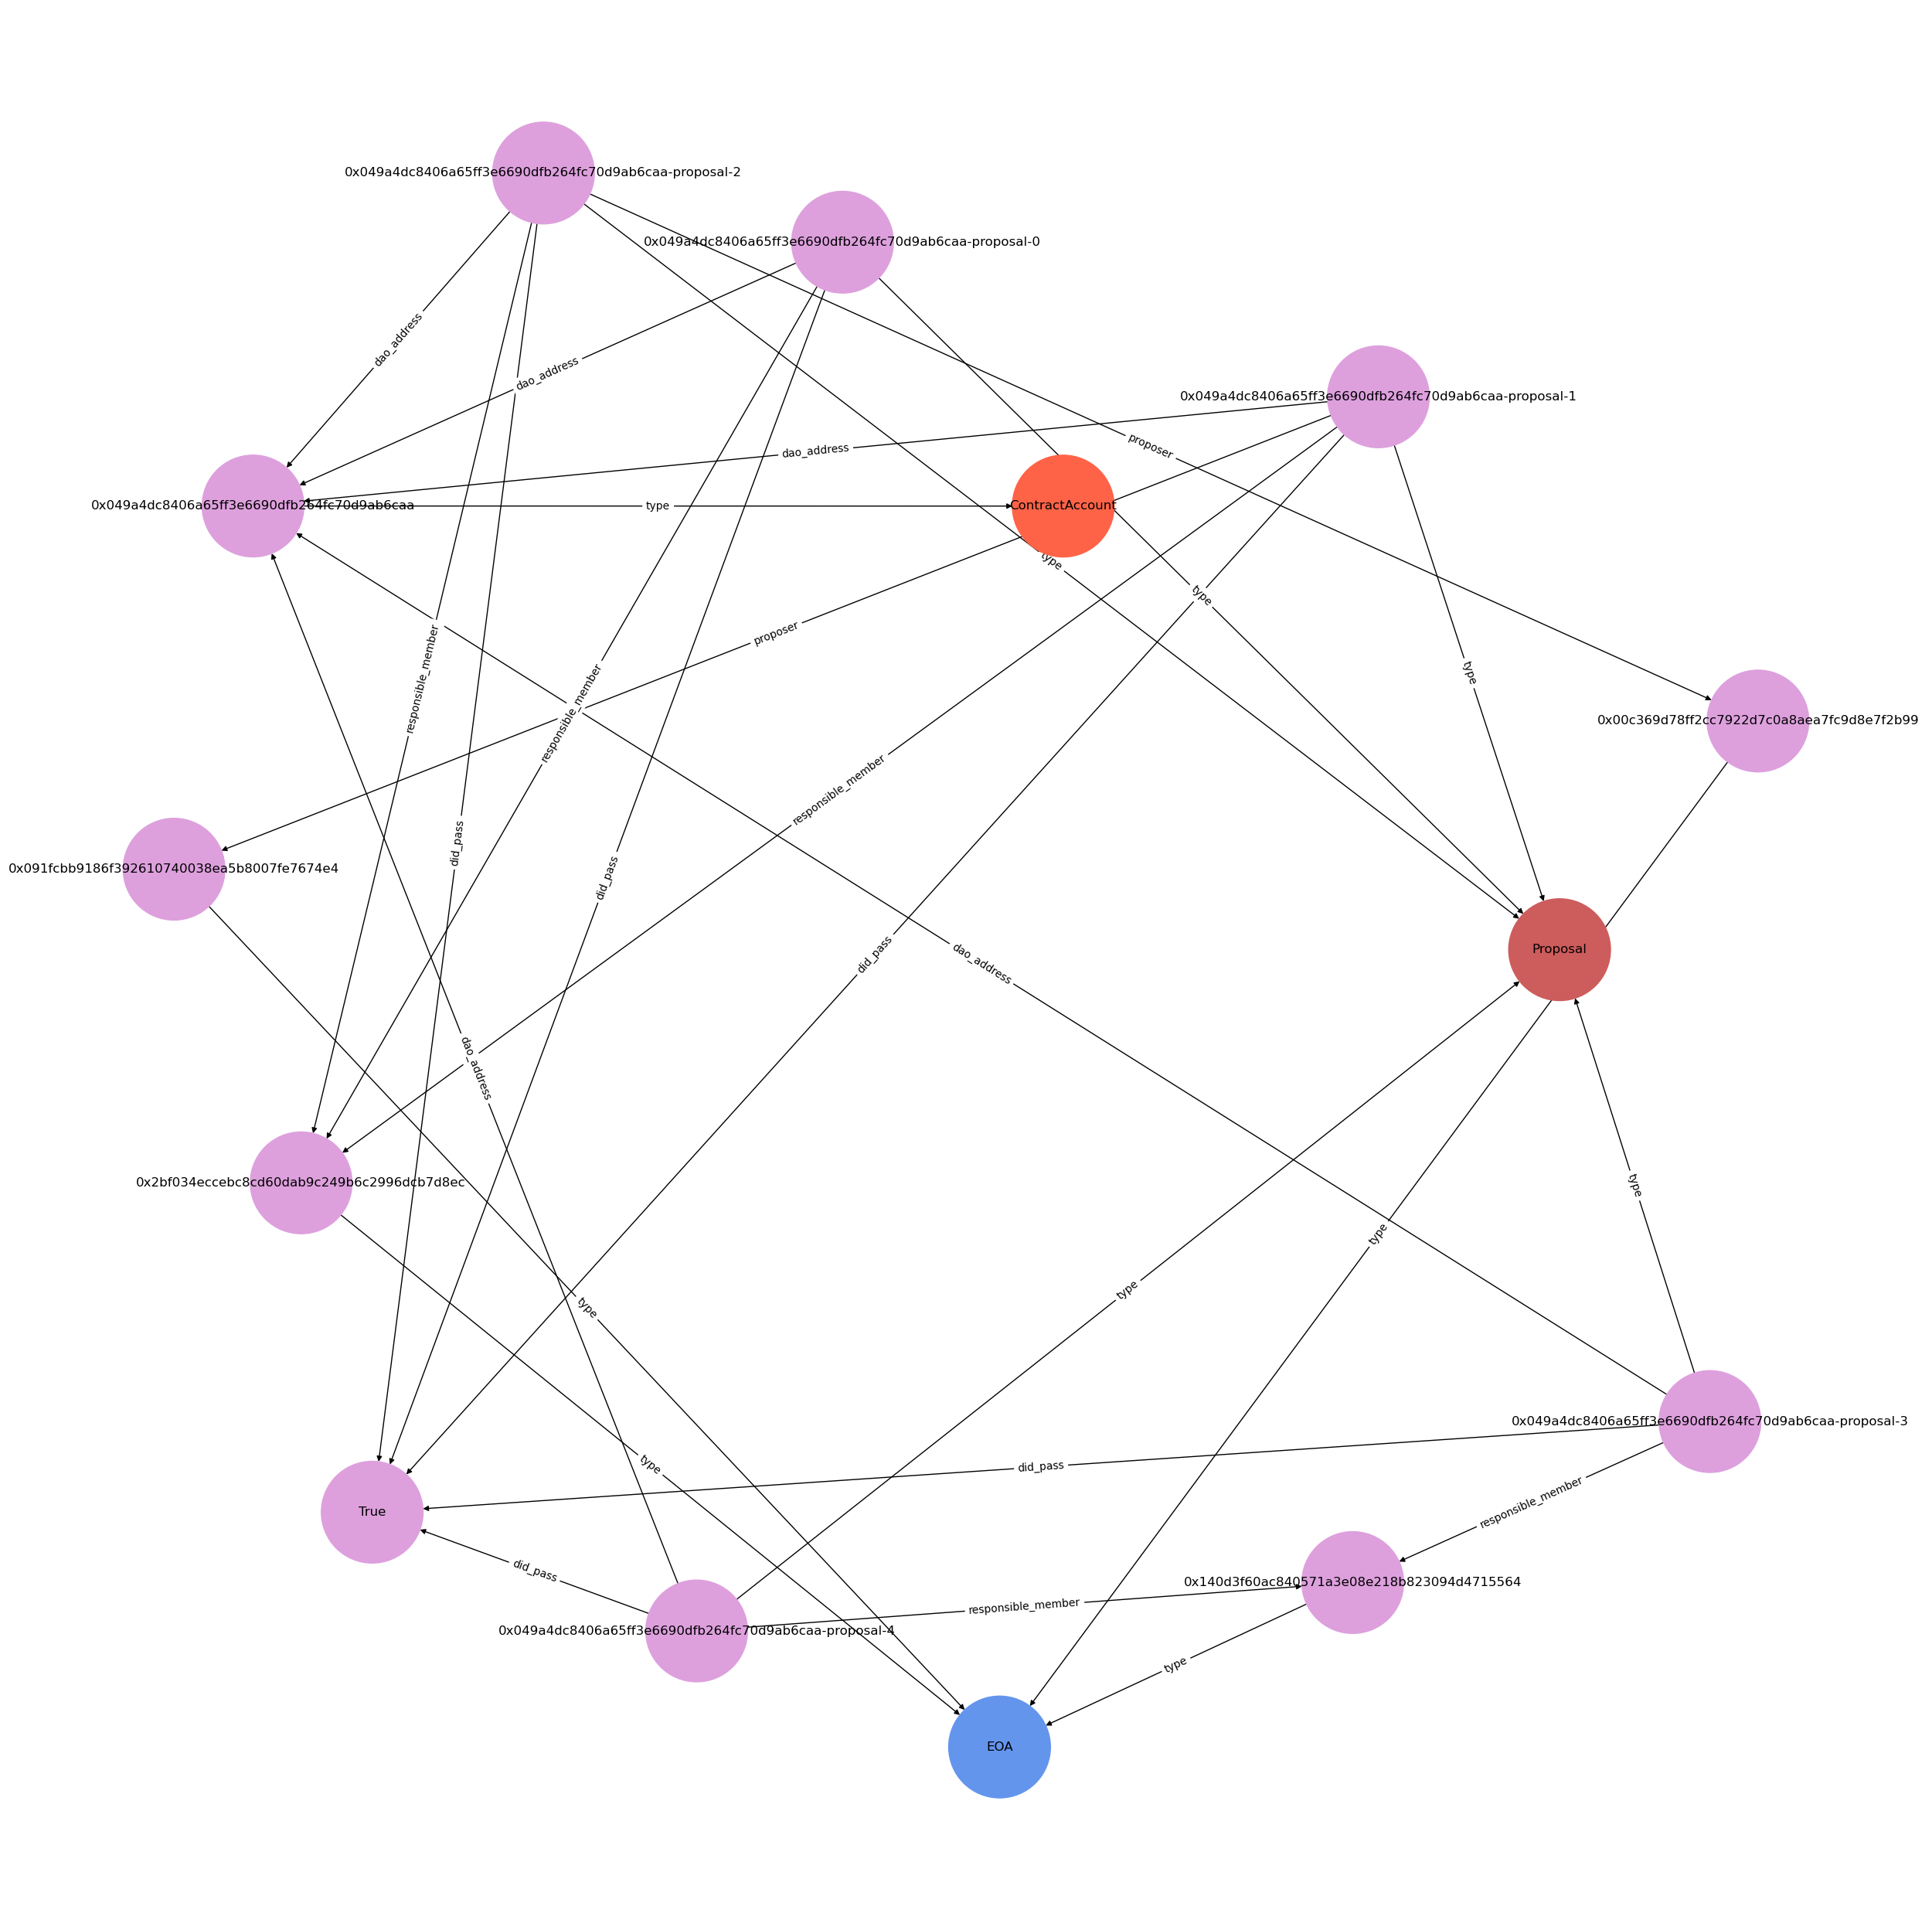

In [166]:
node_colors = []
for node, color in list(dg_daos_proposal_instances.nodes(data="color")):
        node_colors.append(color)
fig, ax = plt.subplots(figsize=(32,32))
daos_layout = nx.spring_layout(dg_daos_proposal_instances, 
                       k=2.7, iterations=20,
                       seed=2)
nx.draw(dg_daos_proposal_instances, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=9000,
        with_labels=True
       )
labels = nx.get_edge_attributes(dg_daos_proposal_instances,'attr_relation')
nx.draw_networkx_edge_labels(dg_daos_proposal_instances,
                             pos = daos_layout,
                             edge_labels=labels)
plt.show()

### 3.7. Knowledge Graph - Analysis

We can obtain the centrality degree in order to get the largest DAOs in the DAOhaus ecosystem based on the number of active members.

In [167]:
def extract_partition_nodes(graph, partition):
    nodeset = [n for n, d in graph.nodes(data=True) if d["bipartite"] == partition]
    if len(nodeset) == 0:
        return print(f"This partition doesn't have any node: {partition}")
    else:
        return nodeset

In [168]:
def find_most_member_dao(graph, dao_nodes, dao_list):
    dcs = (
        pd.Series(nx.bipartite.degree_centrality(graph, dao_nodes))
        .sort_values(ascending=False)
        .to_frame()
    )
    return dcs.reset_index().query(f'index.isin({dao_list})').iloc[0]["index"]

In [169]:
bmembers_df = members_df[["memberAddress"]]
bmembers_df = bmembers_df.drop_duplicates()
bmembers_df.reset_index(inplace =True, drop = True)
bmembers = bmembers_df["memberAddress"].values.tolist()
len(bmembers)

2057

In [170]:
bmembers_df.head()

,memberAddress
0,0x1ecd72869c3044d7d236845b5b6f64954f6eb69c
1,0x4b933cd816c86783b116d070818c6fcdf5bff17a
2,0x5f605f12ce2ff540e9d5cb7b12d66623c23b1e94
3,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077
4,0x7ee54ab0f204bb3a83df90fdd824d8b4abe93222


In [171]:
# DAOs of the active members
bdaos_df = members_df[["daoAddress"]]
bdaos_df = bdaos_df.drop_duplicates()
bdaos_df.reset_index(inplace =True, drop = True)
bdaos = bdaos_df["daoAddress"].values.tolist()
len(bdaos)

94

In [172]:
bdaos_df.head()

,daoAddress
0,0x3a7ebf465d910ecc984872e2316493d5d05ba869
1,0xea9916a3e6a28eca1c551ee3e78737336068395e
2,0x049a4dc8406a65ff3e6690dfb264fc70d9ab6caa
3,0x1e09c5914cbc69bb17872626816abf4fdda24133
4,0x26edf55480c50a2fab52d0d7bdf1dbbf2f4bb14f


In [173]:
from networkx.algorithms import bipartite
bdg_daos = nx.DiGraph()
bdg_daos.add_nodes_from(bmembers, bipartite='member')
bdg_daos.add_nodes_from(bdaos, bipartite='dao')

In [174]:
bipartite.is_bipartite(bdg_daos)

True

In [175]:
member_nodes = extract_partition_nodes(bdg_daos, "member")
member_nodes[0]

'0x1ecd72869c3044d7d236845b5b6f64954f6eb69c'

In [176]:
daos_nodes = extract_partition_nodes(bdg_daos, "dao")
daos_nodes[0]

'0x7426c740b3611f471dadda78004d3efd19cf2cfd'

In [177]:
member_daos_instances_df = members_df[["memberAddress", "daoAddress", "shares"]]
member_daos_instances_df.head(10)

,memberAddress,daoAddress,shares
0,0x1ecd72869c3044d7d236845b5b6f64954f6eb69c,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
1,0x4b933cd816c86783b116d070818c6fcdf5bff17a,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
2,0x5f605f12ce2ff540e9d5cb7b12d66623c23b1e94,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
3,0x78000b0605e81ea9df54b33f72ebc61b5f5c8077,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
4,0x7ee54ab0f204bb3a83df90fdd824d8b4abe93222,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
5,0x807f50afe939ffe8cab4b38d53b9680baa823a20,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
6,0x8ce6ac2ae2ddbc6b35156220f6ff1917f6ca6dcf,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
7,0x97ea4fda43c496e2fbd7849182c3c2628ad55cef,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
8,0xca84541d8b8bf50fd8b042acfd28b1e390703e20,0x3a7ebf465d910ecc984872e2316493d5d05ba869,1
9,0x1426fbd146942e153653863cbe633780c17268da,0xea9916a3e6a28eca1c551ee3e78737336068395e,1


In [178]:
member_daos_instances_df.shape

(2676, 3)

In [179]:
dg_member_daos_instances = nx.from_pandas_edgelist(member_daos_instances_df, 
                                                  'memberAddress', 'daoAddress',
                                                   edge_attr='shares',
                                                   create_using=nx.DiGraph())

In [180]:
bdg_daos = nx.compose(bdg_daos, dg_member_daos_instances)

In [181]:
find_most_member_dao(bdg_daos, daos_nodes, bdaos)

'0xb152b115c94275b54a3f0b08c1aa1d21f32a659a'

In [182]:
daos_proposals_df[daos_proposals_df["daoAddress"] == '0xb152b115c94275b54a3f0b08c1aa1d21f32a659a']

,daoAddress,name,network,createdAt,totalShares,totalLoot
72,0xb152b115c94275b54a3f0b08c1aa1d21f32a659a,MetaCartel xDai,gnosis,2021-03-03 21:31:20,1311,1
